# Importar librerias

In [2]:
import numpy as np 
import pandas as pd 
from   datetime import datetime, timedelta
import os
import glob
import scipy as sc
import seaborn as sns
import statsmodels.api as sm
# import sympy as sp

#Librería de graficación
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

# Personalizar graficas
plt.style.use('default')
mpl.rcParams['xtick.labelsize']=14
mpl.rcParams['ytick.labelsize']=14
mpl.rcParams['font.sans-serif'] = "Century Gothic"
mpl.rcParams['font.family'] = "Century Gothic"
mpl.rcParams['font.weight'] = 'normal'

plt.style.use("seaborn")

# EDA

## Leer datos

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
try:
    df_data = pd.read_excel("/content/drive/Othercomputers/My Computer/Maestria_Sem_II/MachineLearning/FinalWork/Data/DataWaveBreaking.xlsx",
                        sheet_name="Data_Final")
except:
    df_data = pd.read_excel("E:\Camilo\Maestria_Sem_II\MachineLearning\FinalWork\Data\DataWaveBreaking.xlsx",
                        sheet_name="Data_Final")

df_data = df_data.dropna().reset_index(drop=True)
print(df_data.info())
df_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   m (slope)  277 non-null    float64
 1   T (s)      277 non-null    float64
 2   Lo (cm)    277 non-null    float64
 3   Ho (cm)    277 non-null    float64
 4   Hb (cm)    277 non-null    float64
 5   hb (cm)    277 non-null    float64
dtypes: float64(6)
memory usage: 13.1 KB
None


,m (slope),T (s),Lo (cm),Ho (cm),Hb (cm),hb (cm)
0,0.0125,1.2,224.6,8.8,8.6,12.5
1,0.0125,1.2,224.6,9.1,9.1,12.5
2,0.0125,1.2,224.6,12.0,12.2,13.8
3,0.0125,1.2,224.6,14.8,14.2,16.3
4,0.0125,1.2,224.6,11.7,11.6,16.3


In [7]:
df_data.describe().round(3)

,m (slope),T (s),Lo (cm),Ho (cm),Hb (cm),hb (cm)
count,277.000,277.000,277.000,277.000,277.000,277.000
mean,0.059,1.661,497.681,10.581,12.570,14.367
std,0.054,0.793,677.935,10.729,12.504,16.125
min,0.003,0.700,76.400,1.036,2.438,3.048
25%,0.012,1.200,224.600,7.200,9.144,9.900
50%,0.050,1.500,351.300,9.800,11.440,12.500
75%,0.100,2.000,613.000,12.200,13.700,16.300
max,0.200,6.000,5623.560,137.000,150.000,200.000


In [6]:
df_X = df_data.iloc[:,:-2]

Y1 = df_data["Hb (cm)"]
Y2 = df_data["hb (cm)"]
df_X


,m (slope),T (s),Lo (cm),Ho (cm)
0,0.0125,1.2,224.6,8.8
1,0.0125,1.2,224.6,9.1
2,0.0125,1.2,224.6,12.0
3,0.0125,1.2,224.6,14.8
4,0.0125,1.2,224.6,11.7
...,...,...,...,...
272,0.0500,3.0,598.0,10.0
273,0.0500,3.0,613.0,15.0
274,0.0500,4.0,794.0,5.0
275,0.0500,4.0,816.0,10.0


## Graficas

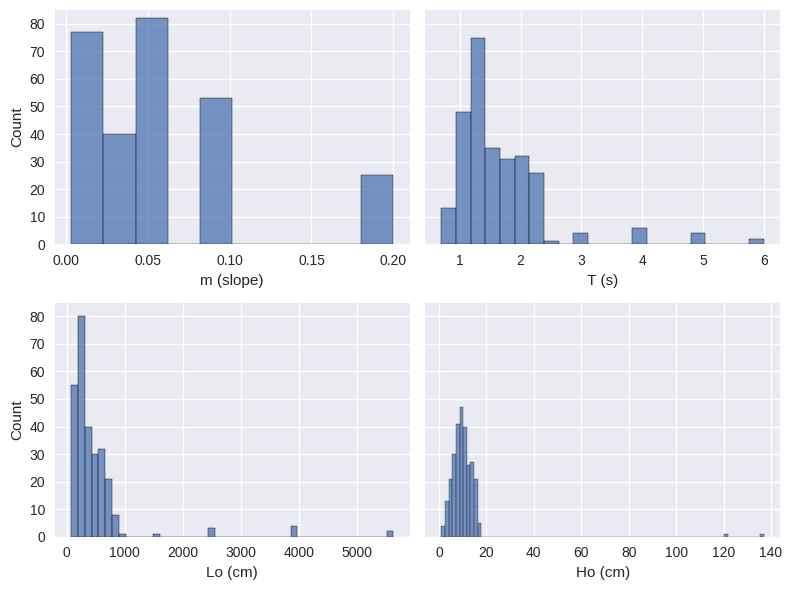

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6),sharey=True)
# sns.histplot(data=df_data, x="m (slope)", ax=axs[0])
sns.histplot(data=df_data, x="m (slope)", ax=axs[0,0])
axs[0,0].set(yticks=np.arange(0,81,10),ylim=[0,85])
sns.histplot(data=df_data, x="T (s)", ax=axs[0,1])
sns.histplot(data=df_data, x="Lo (cm)", ax=axs[1,0])
sns.histplot(data=df_data, x="Ho (cm)", ax=axs[1,1])
fig.tight_layout()

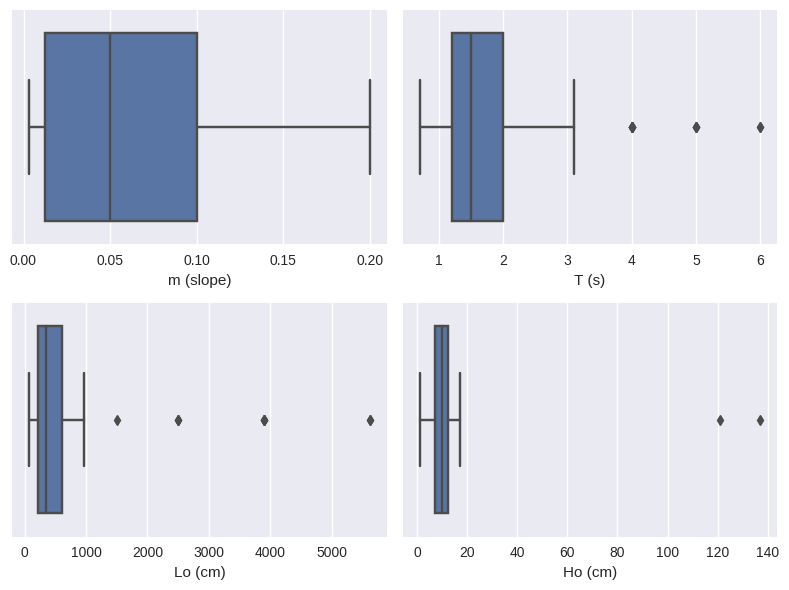

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
# sns.histplot(data=df_data, x="m (slope)", ax=axs[0])
sns.boxplot(data=df_data, x="m (slope)", ax=axs[0,0])
sns.boxplot(data=df_data, x="T (s)", ax=axs[0,1])
sns.boxplot(data=df_data, x="Lo (cm)", ax=axs[1,0])
sns.boxplot(data=df_data, x="Ho (cm)", ax=axs[1,1])
fig.tight_layout()

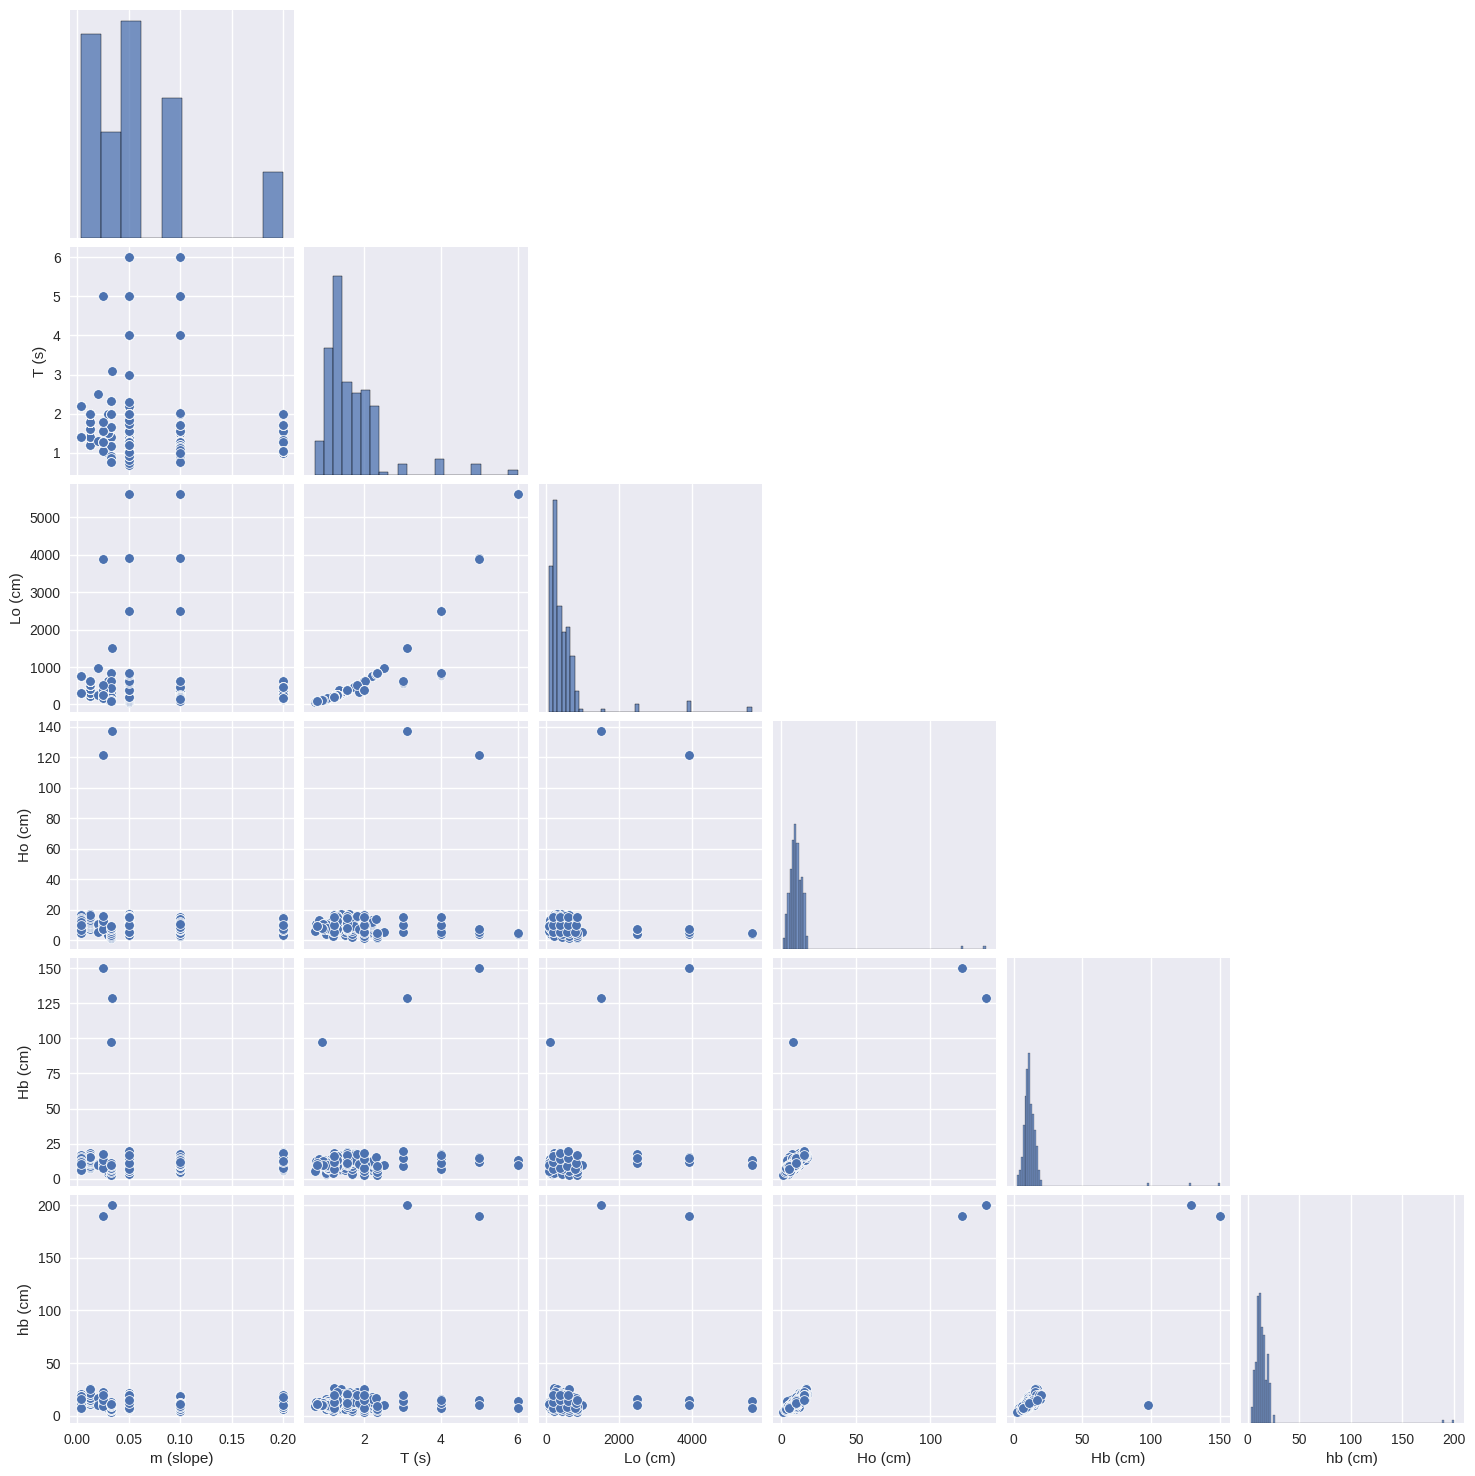

In [11]:
sns.pairplot(data=df_data, corner=True)

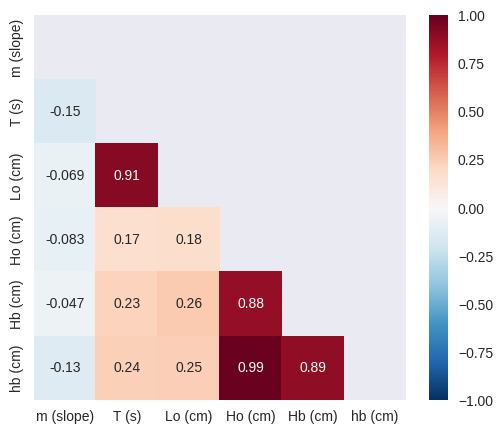

In [12]:
# fig, ax = plt.subplots(1,2,figsize = [12,5])
# # Correlation for DF Y1
# corr_Y1 = df_Y1.corr()
# matrix_Y1 = np.triu(corr_Y1)
# sns.heatmap(corr_Y1, annot=True, mask=matrix_Y1, cmap=plt.cm.RdBu_r, center = 0, vmin=-1,vmax=1, ax = ax[0])
# ax[0].set(title="Y1 = Hb (Break Height)")
# #Correlation for DF Y2
# corr_Y2 = df_Y2.corr()
# matrix_Y2 = np.triu(corr_Y2)
# sns.heatmap(corr_Y2, annot=True, mask=matrix_Y2, cmap=plt.cm.RdBu_r, center = 0, vmin=-1,vmax=1, ax = ax[1])
# ax[1].set(title="Y2 = hb (Break Depth)")

plt.figure(figsize=(6,5))
corr = df_data.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix, cmap=plt.cm.RdBu_r, center = 0, vmin=-1,vmax=1)

<ipython-input-13-e044bfcdd934>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simpl["Hb/hb"] = df_data["Hb (cm)"]/df_data["hb (cm)"]


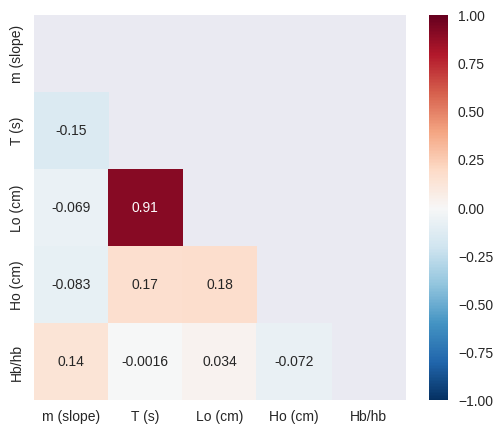

In [13]:
plt.figure(figsize=(6,5))

df_simpl = df_data.iloc[:,:-2]
df_simpl["Hb/hb"] = df_data["Hb (cm)"]/df_data["hb (cm)"]

corr = df_simpl.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
# using the upper triangle matrix as mask 
sns.heatmap(df_simpl.corr(), annot=True, mask=matrix, cmap=plt.cm.RdBu_r, center = 0, vmin=-1,vmax=1)

In [14]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.001)
selector.fit(df_X)
print(selector.get_support())
df_X.columns[selector.get_support()] 

[ True  True  True  True]


Index(['m (slope)', 'T (s)', 'Lo (cm)', 'Ho (cm)'], dtype='object')

# Validacion cruzada

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## Train-Test-Split

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test, Y1_train,Y1_test = train_test_split(df_X,Y1, train_size=0.8, random_state=1)
X_train,X_test, Y2_train,Y2_test = train_test_split(df_X,Y2, train_size=0.8, random_state=1)

print('Dimensiones de la matriz para entrenar:',X_train.shape)
print('Dimensiones del vector Y1 para entrenar:',Y1_train.shape)
print('Dimensiones del vector Y2 para entrenar:',Y2_train.shape)

print('Dimensiones de la matriz para validar:',X_test.shape)
print('Dimensiones del vector Y1 para validar:',Y1_test.shape)
print('Dimensiones del vector Y2 para validar:',Y2_test.shape)

Dimensiones de la matriz para entrenar: (221, 4)
Dimensiones del vector Y1 para entrenar: (221,)
Dimensiones del vector Y2 para entrenar: (221,)
Dimensiones de la matriz para validar: (56, 4)
Dimensiones del vector Y1 para validar: (56,)
Dimensiones del vector Y2 para validar: (56,)


In [17]:
X_train

,m (slope),T (s),Lo (cm),Ho (cm)
62,0.00333,2.20,755.000000,8.60
236,0.10000,2.01,630.100000,9.80
42,0.01250,1.80,505.400000,14.50
132,0.05000,2.00,624.500000,3.10
224,0.05000,1.28,255.000000,16.00
...,...,...,...,...
203,0.05000,1.28,254.000000,9.90
255,0.05000,0.74,85.497335,10.63
72,0.00333,1.40,305.800000,11.70
235,0.03400,3.10,1499.000000,137.00


In [18]:
from sklearn.utils import class_weight
print("Score Linear Regression for Y1: ",LinearRegression().fit(X_train,Y1_train).score(X_test,Y1_test))
print("Score Linear Regression for Y2: ",LinearRegression().fit(X_train,Y2_train).score(X_test,Y2_test))

Score Linear Regression for Y1:  0.771389166238287
Score Linear Regression for Y2:  0.7640835496539504


## K-fold

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle= True,random_state=1)
model = RandomForestRegressor()
results_Y1 = cross_val_score(model, X_train, Y1_train, cv=kfold, scoring='r2')
results_Y2 = cross_val_score(model, X_train, Y2_train, cv=kfold, scoring='r2')

print("Results for RF Regressor Y1: \n",results_Y1)
print(results_Y1.mean())
print(results_Y1.std())
print("Results for RF Regressor Y2: \n",results_Y2)
print(results_Y2.mean())
print(results_Y2.std())

Results for RF Regressor Y1: 
 [ 0.78760142 -3.35498724  0.96737731 -0.03360597 -1.66531173]
-0.6597852418932965
1.6376742016992487
Results for RF Regressor Y2: 
 [0.89105573 0.59792919 0.83473299 0.82292038 0.82165194]
0.7936580459133242
0.10111694885816751


**PRECAUCIÓN:** POSIBLES PROBLEMAS DE VARIANZA PARA LA VARIABLE Y1

## Cross-validate

### Ridge

In [20]:
from sklearn.model_selection import cross_validate

results_ridge_Y1 = cross_validate(Ridge(),df_X,Y1,return_train_score=True,cv=5)
results_ridge_Y2 = cross_validate(Ridge(),df_X,Y2,return_train_score=True,cv=5)

train_scores_ridge_Y1 = results_ridge_Y1['train_score']
test_scores_ridge_Y1 = results_ridge_Y1['test_score']

train_scores_ridge_Y2 = results_ridge_Y2['train_score']
test_scores_ridge_Y2 = results_ridge_Y2['test_score']


print(
    'Train scores Ridge Y1: \n',
    train_scores_ridge_Y1,"\n",
    np.mean(train_scores_ridge_Y1),
 )

print(
    'Test scores Ridge Y1: \n',
    test_scores_ridge_Y1,"\n",
    np.mean(test_scores_ridge_Y1),
)

print(
    'Train scores Ridge Y2: \n',
    train_scores_ridge_Y2,"\n",
    np.mean(train_scores_ridge_Y2),
 )

print(
    'Test scores Ridge Y2: \n',
    test_scores_ridge_Y2,"\n",
    np.mean(test_scores_ridge_Y2),
)



Train scores Ridge Y1: 
 [0.79361528 0.79961436 0.78413311 0.78922826 0.8204022 ] 
 0.7973986430518604
Test scores Ridge Y1: 
 [ 0.06842915 -7.32250263  0.82701022  0.83151766  0.75250772] 
 -0.9686075762313294
Train scores Ridge Y2: 
 [0.98441507 0.99172893 0.98481117 0.98377813 0.84667991] 
 0.958282642938677
Test scores Ridge Y2: 
 [ 0.71314268 -2.31205943  0.58747188  0.84633874  0.9669546 ] 
 0.16036969198816844


### LASSO

In [21]:

results_lasso_Y1 = cross_validate(Lasso(),df_X,Y1,return_train_score=True,cv=5)
results_lasso_Y2 = cross_validate(Lasso(),df_X,Y2,return_train_score=True,cv=5)

train_scores_lasso_Y1 = results_lasso_Y1['train_score']
test_scores_lasso_Y1 = results_lasso_Y1['test_score']

train_scores_lasso_Y2 = results_lasso_Y2['train_score']
test_scores_lasso_Y2 = results_lasso_Y2['test_score']


print(
    'Train scores LASSO Y1: \n',
    train_scores_lasso_Y1,"\n",
    np.mean(train_scores_lasso_Y1),
 )

print(
    'Test scores LASSO Y1: \n',
    test_scores_lasso_Y1,"\n",
    np.mean(test_scores_lasso_Y1),
)

print(
    'Train scores LASSO Y2: \n',
    train_scores_lasso_Y2,"\n",
    np.mean(train_scores_lasso_Y2),
 )

print(
    'Test scores LASSO Y2: \n',
    test_scores_lasso_Y2,"\n",
    np.mean(test_scores_lasso_Y2),
)

Train scores LASSO Y1: 
 [0.79321305 0.79430709 0.78291788 0.78804873 0.78273776] 
 0.7882449047344032
Test scores LASSO Y1: 
 [ 0.05920897 -2.18173941  0.84251314  0.83727966  0.7239898 ] 
 0.05625043333804902
Train scores LASSO Y2: 
 [0.98362855 0.99002913 0.98397257 0.98253304 0.81938484] 
 0.9519096255814021
Test scores LASSO Y2: 
 [ 0.66338876 -1.42804331  0.56237584  0.83075461  0.94855101] 
 0.3154053818076429


## Leave One Out

In [22]:
from sklearn.model_selection import LeavePOut
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])
lpo = LeavePOut(2)
lpo.get_n_splits(X)
for train_index, test_index in lpo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


TRAIN: [2 3] TEST: [0 1]
TRAIN: [1 3] TEST: [0 2]
TRAIN: [1 2] TEST: [0 3]
TRAIN: [0 3] TEST: [1 2]
TRAIN: [0 2] TEST: [1 3]
TRAIN: [0 1] TEST: [2 3]


In [23]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
model = LinearRegression()
results_Y1 = cross_val_score(model, df_X, Y1, cv=loocv, scoring='neg_mean_squared_error')
results_Y2 = cross_val_score(model, df_X, Y2, cv=loocv, scoring='neg_mean_squared_error')
# results

print("Results LOO Y1:\n",
"Mean: ", results_Y1.mean(),
"\n Std: ", results_Y1.std())

print("Results LOO Y2:\n",
"Mean: ", results_Y2.mean(),
"\n Std: ", results_Y2.std())
# print(results.std())

Results LOO Y1:
 Mean:  -38.285996773874366 
 Std:  486.77943892288073
Results LOO Y2:
 Mean:  -5.268957601159065 
 Std:  15.29160567462833


In [24]:
from sklearn.model_selection import LeavePOut
lpocv = LeavePOut(1)
model = LinearRegression()
results_Y1 = cross_val_score(model, df_X, Y1, cv=lpocv, scoring='r2')
# results_Y2 = cross_val_score(model, df_X, Y2, cv=lpocv, scoring='r2')
# results

print("Results LOO Y1:\n",
"Mean: ", results_Y1.mean(),
"\n Std: ", results_Y1.std())

# print("Results LOO Y2:\n",
# "Mean: ", results_Y2.mean(),
# "\n Std: ", results_Y2.std())
# print(results.std())

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

Results LOO Y1:
 Mean:  nan 
 Std:  nan


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

## ShuffleSplit

In [25]:
from sklearn.model_selection import ShuffleSplit

kfold = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
model = LinearRegression()
results_Y1 = cross_val_score(model, df_X, Y1, cv=kfold, scoring='r2')
results_Y2 = cross_val_score(model, df_X, Y2, cv=kfold, scoring='r2')

print("Results ShufSpl Y1:\n",
"Mean: ", results_Y1.mean(),
"\n Std: ", results_Y1.std())

print("Results ShufSpl Y2:\n",
"Mean: ", results_Y2.mean(),
"\n Std: ", results_Y2.std())

# print(results)
# print(results.mean())
# print(results.std())

Results ShufSpl Y1:
 Mean:  0.8784044079238742 
 Std:  0.07190054471662205
Results ShufSpl Y2:
 Mean:  0.9089739520592458 
 Std:  0.10212289292071115


# Selección hiperparametros

## ValidationCurve

### KNeighbors Regressor

In [26]:
from sklearn.neighbors import KNeighborsRegressor

res_KNeigh_Y1 = cross_validate(KNeighborsRegressor(n_neighbors=10), df_X, Y1, cv=5)
res_KNeigh_Y2 = cross_validate(KNeighborsRegressor(n_neighbors=10), df_X, Y2, cv=5)

print("Results KNeighbors Y2: \n", 
res_KNeigh_Y1)
print("Results KNeighbors Y2: \n", 
res_KNeigh_Y2)

Results KNeighbors Y2: 
 {'fit_time': array([0.00451255, 0.00190735, 0.00171828, 0.00175333, 0.00170112]), 'score_time': array([0.00293541, 0.00206494, 0.00192356, 0.00189328, 0.00187588]), 'test_score': array([-0.52439322, -5.84818994, -0.3947861 ,  0.32794413, -0.08465488])}
Results KNeighbors Y2: 
 {'fit_time': array([0.00185347, 0.00169325, 0.00168586, 0.00165081, 0.00166631]), 'score_time': array([0.00186777, 0.00186896, 0.00178313, 0.00200129, 0.00178838]), 'test_score': array([-1.37631533, -8.26080123, -0.45232977,  0.18582943, -0.04932174])}


In [27]:
np.arange(1,100,2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])

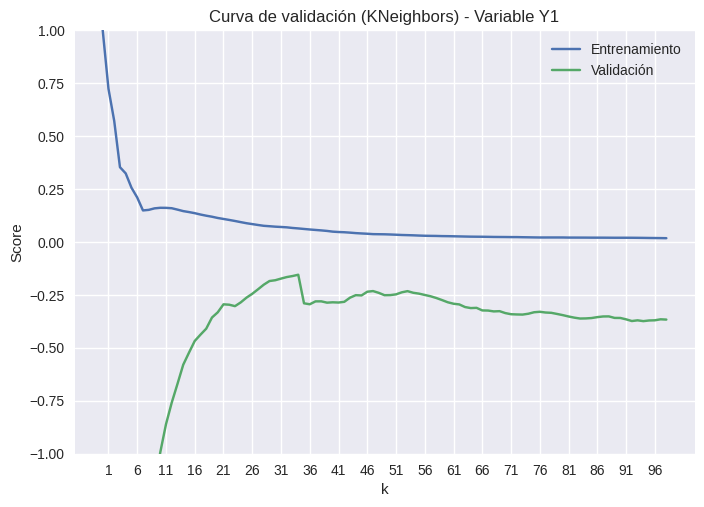

In [28]:
from sklearn.model_selection import validation_curve
k = np.arange(1,100,1)

train_scores, test_scores = validation_curve(KNeighborsRegressor(), df_X, Y1, param_name='n_neighbors', param_range=k, cv=10)

plt.figure()
plt.plot(np.mean(train_scores,axis=1),label="Entrenamiento")
plt.plot(np.mean(test_scores,axis=1),label="Validación")
plt.title("Curva de validación (KNeighbors) - Variable Y1")    
plt.xlabel("k")
plt.ylabel("Score")
plt.ylim(-1, 1)
plt.xticks(np.arange(1,101,5),np.arange(1,101,5))
plt.legend(loc="best")
plt.grid(True);

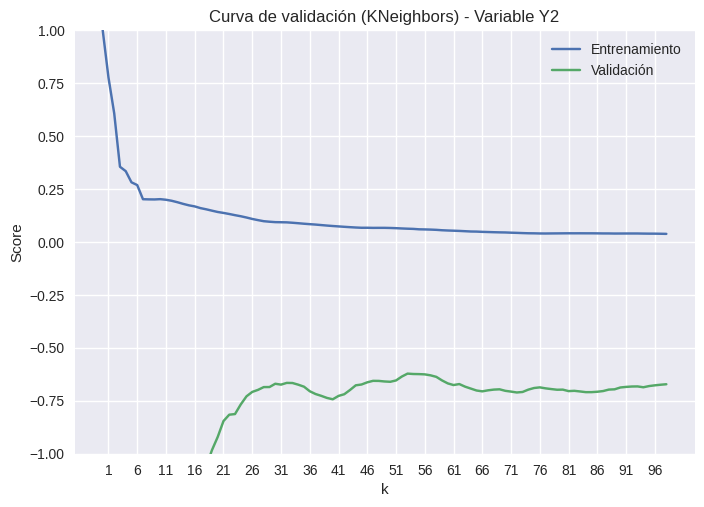

In [29]:
k = np.arange(1,100,1)

train_scores, test_scores = validation_curve(KNeighborsRegressor(), df_X, Y2, param_name='n_neighbors', param_range=k, cv=10)

plt.figure()
plt.plot(np.mean(train_scores,axis=1),label="Entrenamiento")
plt.plot(np.mean(test_scores,axis=1),label="Validación")
plt.title("Curva de validación (KNeighbors) - Variable Y2")    
plt.xlabel("k")
plt.ylabel("Score")
plt.ylim(-1, 1)
plt.xticks(np.arange(1,100,5),np.arange(1,100,5))
plt.legend(loc="best")
plt.grid(True);

### Desion Tree Regressoe

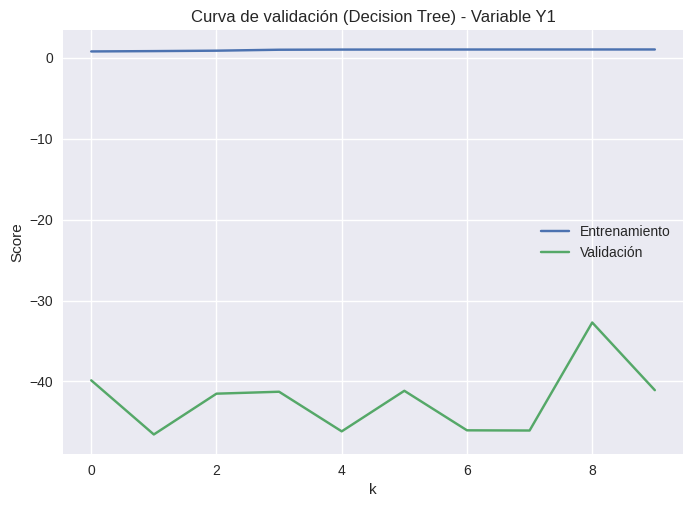

In [30]:
from sklearn.tree import DecisionTreeRegressor
k = np.arange(1,11,1)

train_scores, test_scores = validation_curve(DecisionTreeRegressor(), df_X, Y1, param_name='max_depth', param_range=k, cv=7)

plt.figure()
plt.plot(np.mean(train_scores,axis=1),label="Entrenamiento")
plt.plot(np.mean(test_scores,axis=1),label="Validación")
plt.title("Curva de validación (Decision Tree) - Variable Y1")    
plt.xlabel("k")
plt.ylabel("Score")
# plt.ylim(-1, 1)
# plt.xticks(np.arange(1,101,5),np.arange(1,101,5))
plt.legend(loc="best")
plt.grid(True);

## YellowBrick

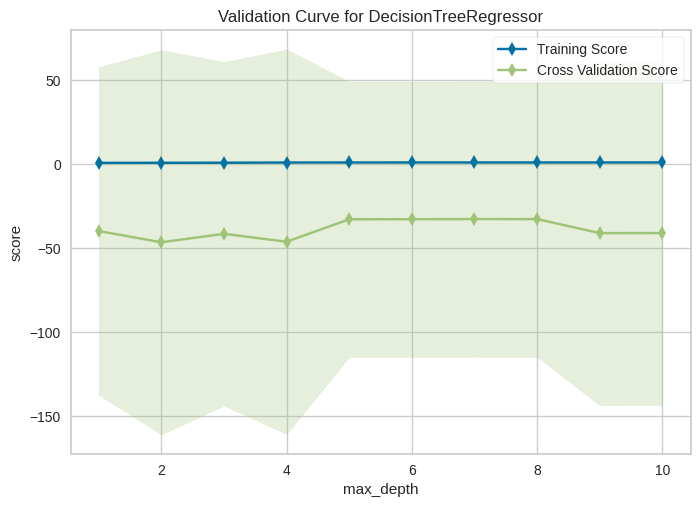

In [31]:
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.datasets import load_energy

viz = ValidationCurve(DecisionTreeRegressor(), param_name="max_depth", param_range=np.arange(1, 11), cv=7, scoring="r2")
viz.fit(df_X, Y1)
viz.show()

## Grid Search

In [32]:
# from sklearn.grid_search import GridSearchCV

# param_grid = {'polynomialfeatures__degree': np.arange(21),
#               'linearregression__fit_intercept': [True, False],
#               'linearregression__normalize': [True, False]}

# grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [33]:
from sklearn.model_selection import GridSearchCV

alphas = np.array([1000,100,50,10,1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(df_X, Y2)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.3154053818076429
1.0


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.343e+02, tolerance: 7.032e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet

## Randon Search

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_grid = {'alpha': uniform()}
model = Lasso()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=1)
rsearch.fit(df_X, Y2)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

0.36079861715033645
0.14038693859523377


# Metricas

## MAE

In [35]:
kfold = KFold(n_splits=5)
model = LinearRegression()
results = cross_val_score(model, df_X, Y1, cv=kfold, scoring='neg_mean_absolute_error')
print(results)
print(results.mean())
print(results.std())

[-2.24519552 -5.0272098  -1.12987271 -1.00549933 -3.70507348]
-2.6225701668016064
1.5452883630067913


## MSE

In [36]:
results = cross_val_score(model, df_X, Y1, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean())
print(results.std())

-54.662681739528
68.13882083612604


## R2 Metric

In [37]:
kfold = KFold(n_splits=5)
model = LinearRegression()
results = cross_val_score(model, df_X, Y2, cv=kfold, scoring='r2')
print(results.mean())
print(results.std())

0.18718873066387925
1.190564266005197


# BIAS - Variance

In [38]:
X_train,X_test, Y1_train,Y1_test = train_test_split(df_X,Y1, train_size=0.8, random_state=1)
X_train,X_test, Y2_train,Y2_test = train_test_split(df_X,Y2, train_size=0.8, random_state=1)
X_train, Y1_train


(     m (slope)  T (s)      Lo (cm)  Ho (cm)
 62     0.00333   2.20   755.000000     8.60
 236    0.10000   2.01   630.100000     9.80
 42     0.01250   1.80   505.400000    14.50
 132    0.05000   2.00   624.500000     3.10
 224    0.05000   1.28   255.000000    16.00
 ..         ...    ...          ...      ...
 203    0.05000   1.28   254.000000     9.90
 255    0.05000   0.74    85.497335    10.63
 72     0.00333   1.40   305.800000    11.70
 235    0.03400   3.10  1499.000000   137.00
 37     0.01250   1.80   505.400000    10.90
 
 [221 rows x 4 columns], 62      11.30
 236     10.50
 42      13.80
 132      5.30
 224     16.50
         ...  
 203     11.50
 255     12.44
 72      12.10
 235    129.00
 37      11.60
 Name: Hb (cm), Length: 221, dtype: float64)

## Linear Regresion

In [39]:
lr=LinearRegression()
lr.fit(X_train, Y1_train)

train_score=lr.score(X_train, Y1_train)
test_score=lr.score(X_test, Y1_test)
print("Results LR Y1: \n",
'Train score:', train_score,
'\n Test score:', test_score)

Results LR Y1: 
 Train score: 0.7898125344118274 
 Test score: 0.771389166238287


In [40]:
lr=LinearRegression()
lr.fit(X_train, Y2_train)

train_score=lr.score(X_train, Y2_train)
test_score=lr.score(X_test, Y2_test)
print("Results LR Y2: \n",
'Train score:', train_score,
'\n Test score:', test_score)

Results LR Y2: 
 Train score: 0.9860714102074398 
 Test score: 0.7640835496539504


**OBSERVACIÓN:** Para el modelo *Linear Regression* los resultados señalan un burn ajuste en los datos de entrenamiento para las dos variables de salida, tanto para los datos de entrenamiento como los datos de validación cruzada para , sin embargo se debe implimentar la estrategia de Validación Cruzada Kfold para evaluar problemas de varianza con diferentes conjuntos de datos de testeo. 

## KNN

In [41]:
kn = KNeighborsRegressor()
kn.fit(X_train, Y1_train)

train_score=kn.score(X_train, Y1_train)
test_score=kn.score(X_test, Y1_test)
print("Results KNN Y1: \n",
'Train score:', train_score,
'\n Test score:', test_score)

Results KNN Y1: 
 Train score: 0.25264511157891834 
 Test score: -1.8448038231415738


In [42]:
kn = KNeighborsRegressor()
kn.fit(X_train, Y2_train)

train_score=kn.score(X_train, Y2_train)
test_score=kn.score(X_test, Y2_test)
print("Results KNN Y2: \n",
'Train score:', train_score,
'\n Test score:', test_score)

Results KNN Y2: 
 Train score: 0.24032048086227087 
 Test score: -1.5158501741642967


**OBSERVACIÓN:** Para el modelo KNN Regresor los resultados señalan un pobre ajuste, tanto para los datos de entrenamiento como los datos de validación, por lo tanto estamos ante un sub-ajuste del modelo (*bias*) y underfitting. Es decir el modelo no se ajusta adecuadamente a los datos.

## Learning Curve

In [43]:
from sklearn.model_selection import learning_curve

lc_Y1 = learning_curve(KNeighborsRegressor(n_neighbors=5),df_X,Y1,cv=5,train_sizes=np.linspace(0.25,1,10)) ### Train_sizes define el numero de puntos en el samples 
samples_Y1, train_Y1, test_Y1 = lc_Y1[0], lc_Y1[1], lc_Y1[2]
lc_Y1

(array([ 55,  73,  92, 110, 128, 147, 165, 184, 202, 221]),
 array([[0.69886816, 0.71251265, 0.71251265, 0.71251265, 0.71251265],
        [0.75150394, 0.77585769, 0.74913203, 0.74913203, 0.74913203],
        [0.79433359, 0.80312425, 0.81104856, 0.81104856, 0.81104856],
        [0.64174765, 0.71227935, 0.77196247, 0.77196247, 0.77196247],
        [0.72197388, 0.77045057, 0.74250299, 0.79574016, 0.79574016],
        [0.79107584, 0.82833259, 0.79341401, 0.79281702, 0.79281702],
        [0.80764805, 0.84499966, 0.82022272, 0.75993839, 0.75993839],
        [0.29777436, 0.39158041, 0.31466685, 0.28336865, 0.76152616],
        [0.2850752 , 0.49413825, 0.28863433, 0.2789425 , 0.80235437],
        [0.29029592, 0.46087585, 0.27857126, 0.28691911, 0.81926682]]),
 array([[ 6.09162309e-02,  3.04862323e-01, -2.67492445e-01,
          2.89926586e-01, -4.02584708e-02],
        [-6.89155945e-01,  2.89934766e-01, -2.72588381e-01,
          2.89926586e-01, -7.07352071e-02],
        [-1.61562725e+00, -6.6

Text(0.5, 1.0, 'Learning Curve')

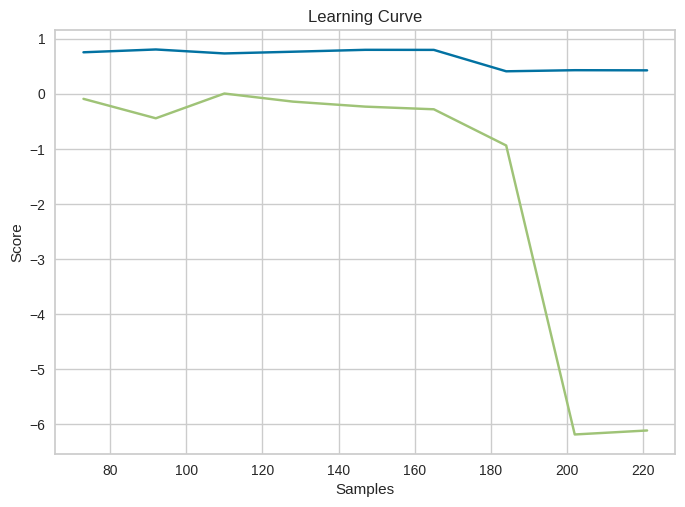

In [44]:
plt.figure()
plt.plot(samples_Y1[1:],np.mean(train_Y1,axis=1)[1:])
plt.plot(samples_Y1[1:],np.mean(test_Y1,axis=1)[1:])
plt.ylabel('Score')
plt.xlabel('Samples')

plt.title("Learning Curve")

# ****** SUPERVISED MODELS ******

## STANDARIZATION AND NORMALIZATION

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

st = StandardScaler()
df_X_Stand = pd.DataFrame(st.fit_transform(df_X),columns=df_X.columns)
df_X_Stand

,m (slope),T (s),Lo (cm),Ho (cm)
0,-0.866025,-0.582417,-0.403541,-0.166287
1,-0.866025,-0.582417,-0.403541,-0.138276
2,-0.866025,-0.582417,-0.403541,0.132505
3,-0.866025,-0.582417,-0.403541,0.393949
4,-0.866025,-0.582417,-0.403541,0.104494
...,...,...,...,...
272,-0.171861,1.692677,0.148246,-0.054240
273,-0.171861,1.692677,0.170412,0.412624
274,-0.171861,2.956618,0.437882,-0.521104
275,-0.171861,2.956618,0.470392,-0.054240


In [8]:
mm = MinMaxScaler()
df_X_MinMax = pd.DataFrame(mm.fit_transform(df_X),columns=df_X.columns)
df_X_MinMax

,m (slope),T (s),Lo (cm),Ho (cm)
0,0.046626,0.094340,0.026716,0.057101
1,0.046626,0.094340,0.026716,0.059308
2,0.046626,0.094340,0.026716,0.080637
3,0.046626,0.094340,0.026716,0.101231
4,0.046626,0.094340,0.026716,0.078430
...,...,...,...,...
272,0.237301,0.433962,0.094030,0.065927
273,0.237301,0.433962,0.096734,0.102702
274,0.237301,0.622642,0.129363,0.029152
275,0.237301,0.622642,0.133329,0.065927


## *RECURSIVE FEATURE ELIMINATION (RFE)*

En este métodos se utiliza un modelo de *machine learning* para seleccionar las variables, eliminando las de menor importancia en un proceso iterativo. El argumento *step* corresponde al número de variables eliminadas en cada iteración.

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

rfe=RFE(estimator=LinearRegression(),n_features_to_select = 3, step = 1)
fit=rfe.fit(df_X,Y1)
print(fit.n_features_)
print(df_X.columns[fit.support_])
print(fit.support_)
print(fit.ranking_)

3
Index(['m (slope)', 'T (s)', 'Ho (cm)'], dtype='object')
[ True  True False  True]
[1 1 2 1]


In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

rfe=RFE(estimator=LinearRegression(),n_features_to_select = 3, step = 1)
fit=rfe.fit(df_X,Y2)
print(fit.n_features_)
print(df_X.columns[fit.support_])
print(fit.support_)
print(fit.ranking_)

3
Index(['m (slope)', 'T (s)', 'Ho (cm)'], dtype='object')
[ True  True False  True]
[1 1 2 1]


In [11]:
df_X = df_X[['m (slope)', 'T (s)', 'Ho (cm)']]
df_X_MinMax = df_X_MinMax[['m (slope)', 'T (s)', 'Ho (cm)']]
df_X_Stand = df_X_Stand[['m (slope)', 'T (s)', 'Ho (cm)']]
df_X, df_X_Stand

(     m (slope)  T (s)  Ho (cm)
 0       0.0125    1.2      8.8
 1       0.0125    1.2      9.1
 2       0.0125    1.2     12.0
 3       0.0125    1.2     14.8
 4       0.0125    1.2     11.7
 ..         ...    ...      ...
 272     0.0500    3.0     10.0
 273     0.0500    3.0     15.0
 274     0.0500    4.0      5.0
 275     0.0500    4.0     10.0
 276     0.0500    4.0     15.0
 
 [277 rows x 3 columns],      m (slope)     T (s)   Ho (cm)
 0    -0.866025 -0.582417 -0.166287
 1    -0.866025 -0.582417 -0.138276
 2    -0.866025 -0.582417  0.132505
 3    -0.866025 -0.582417  0.393949
 4    -0.866025 -0.582417  0.104494
 ..         ...       ...       ...
 272  -0.171861  1.692677 -0.054240
 273  -0.171861  1.692677  0.412624
 274  -0.171861  2.956618 -0.521104
 275  -0.171861  2.956618 -0.054240
 276  -0.171861  2.956618  0.412624
 
 [277 rows x 3 columns])

# LINEAR REGRESSION

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

## Evaluate Model for all data and scaled Xs

### Data without transform

In [51]:
# lm=sm.OLS(Y1, df_X[['m (slope)', 'T (s)', 'Ho (cm)']]).fit()

lm=sm.OLS(Y1, sm.add_constant(df_X)).fit()
print("********************** FOR Y1 *****************************")
print(lm.summary())

********************** FOR Y1 *****************************
                            OLS Regression Results                            
Dep. Variable:                Hb (cm)   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     334.9
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           3.75e-91
Time:                        23:50:20   Log-Likelihood:                -878.50
No. Observations:                 277   AIC:                             1765.
Df Residuals:                     273   BIC:                             1779.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [52]:
model = LinearRegression(fit_intercept = True)
model.fit(df_X,Y1)


print('R2 - Sklearn:',model.score(df_X,Y1))
print('Intercepto:',model.intercept_)
results = pd.DataFrame(model.coef_, df_X.columns, columns = ['Coeficientes'])
results

R2 - Sklearn: 0.7863485234368317
Intercepto: -1.0766539192261408


,Coeficientes
m (slope),8.824157
T (s),1.446321
Ho (cm),1.013309


In [53]:
lm=sm.OLS(Y2, sm.add_constant(df_X)).fit()
print("********************** FOR Y2 *****************************")
print(lm.summary())

********************** FOR Y2 *****************************
                            OLS Regression Results                            
Dep. Variable:                hb (cm)   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     4993.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          4.26e-238
Time:                        23:50:20   Log-Likelihood:                -605.52
No. Observations:                 277   AIC:                             1219.
Df Residuals:                     273   BIC:                             1234.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [54]:
model = LinearRegression(fit_intercept = True)
model.fit(df_X,Y2)


print('R2 - Sklearn:',model.score(df_X,Y2))
print('Intercepto:',model.intercept_)
results = pd.DataFrame(model.coef_, df_X.columns, columns = ['Coeficientes'])
results

R2 - Sklearn: 0.9821005793561173
Intercepto: -2.7145882620504302


,Coeficientes
m (slope),-11.836756
T (s),1.394299
Ho (cm),1.461829


### Standarized data

In [55]:
model = LinearRegression(fit_intercept = True)
model.fit(df_X_Stand,Y1)


print('R2 - Sklearn:',model.score(df_X_Stand,Y1))
print('Intercepto:',model.intercept_)
results = pd.DataFrame(model.coef_, df_X_Stand.columns, columns = ['Coeficientes'])
results

R2 - Sklearn: 0.7863485234368317
Intercepto: 12.5702440433213


,Coeficientes
m (slope),0.476697
T (s),1.144295
Ho (cm),10.852303


In [56]:
model = LinearRegression(fit_intercept = True)
model.fit(df_X_Stand,Y2)


print('R2 - Sklearn:',model.score(df_X_Stand,Y2))
print('Intercepto:',model.intercept_)
results = pd.DataFrame(model.coef_, df_X_Stand.columns, columns = ['Coeficientes'])
results

R2 - Sklearn: 0.9821005793561173
Intercepto: 14.366785559566786


,Coeficientes
m (slope),-0.639444
T (s),1.103136
Ho (cm),15.655843


### Normalized data

In [57]:
model = LinearRegression(fit_intercept = True)
model.fit(df_X_MinMax,Y1)


print('R2 - Sklearn:',model.score(df_X_MinMax,Y1))
print('Intercepto:',model.intercept_)
results = pd.DataFrame(model.coef_, df_X_MinMax.columns, columns = ['Coeficientes'])
results

R2 - Sklearn: 0.7863485234368316
Intercepto: 1.015268088329254


,Coeficientes
m (slope),1.735447
T (s),7.665503
Ho (cm),137.773254


In [58]:
model = LinearRegression(fit_intercept = True)
model.fit(df_X_MinMax,Y2)


print('R2 - Sklearn:',model.score(df_X_MinMax,Y2))
print('Intercepto:',model.intercept_)
results = pd.DataFrame(model.coef_, df_X_MinMax.columns, columns = ['Coeficientes'])
results

R2 - Sklearn: 0.9821005793561173
Intercepto: -0.2630726585000165


,Coeficientes
m (slope),-2.327935
T (s),7.389786
Ho (cm),198.755634


## Validate Model

### Train-Test SPLIT

In [59]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, Y1_train_org, Y1_test_org = train_test_split(df_X,Y1, train_size=0.8, random_state=1)
X_train_nm, X_test_nm, Y1_train_nm, Y1_test_nm = train_test_split(df_X_MinMax, Y1, train_size=0.8, random_state=2)


print('Dimensiones de la matriz ORIGINAL para entrenar:',X_train_org.shape)
print('Dimensiones de la matriz ORIGINAL para validar:',X_train_org.shape)
print('Dimensiones del vector Y1 ORIGINAL para entrenar:',Y1_train_org.shape)
print('Dimensiones del vector Y1 ORIGINAL para validar:',Y1_test_org.shape)
print("\n")
print('Dimensiones de la matriz NORMALIZADA para entrenar:',X_train_nm.shape)
print('Dimensiones de la matriz NORMALIZADA para validar:',X_train_nm.shape)
print('Dimensiones del vector Y1 NORMALIZADA para entrenar:',Y1_train_nm.shape)
print('Dimensiones del vector Y1 NORMALIZADA para validar:',Y1_test_nm.shape)

Dimensiones de la matriz ORIGINAL para entrenar: (221, 3)
Dimensiones de la matriz ORIGINAL para validar: (221, 3)
Dimensiones del vector Y1 ORIGINAL para entrenar: (221,)
Dimensiones del vector Y1 ORIGINAL para validar: (56,)


Dimensiones de la matriz NORMALIZADA para entrenar: (221, 3)
Dimensiones de la matriz NORMALIZADA para validar: (221, 3)
Dimensiones del vector Y1 NORMALIZADA para entrenar: (221,)
Dimensiones del vector Y1 NORMALIZADA para validar: (56,)


In [60]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, Y2_train_org, Y2_test_org = train_test_split(df_X,Y2, train_size=0.8, random_state=1)
X_train_nm, X_test_nm, Y2_train_nm, Y2_test_nm = train_test_split(df_X_MinMax, Y2, train_size=0.8, random_state=2)


print('Dimensiones de la matriz ORIGINAL para entrenar:',X_train_org.shape)
print('Dimensiones de la matriz ORIGINAL para validar:',X_train_org.shape)
print('Dimensiones del vector Y2 ORIGINAL para entrenar:',Y2_train_org.shape)
print('Dimensiones del vector Y2 ORIGINAL para validar:',Y2_test_org.shape)
print("\n")
print('Dimensiones de la matriz NORMALIZADA para entrenar:',X_train_nm.shape)
print('Dimensiones de la matriz NORMALIZADA para validar:',X_train_nm.shape)
print('Dimensiones del vector Y2 NORMALIZADA para entrenar:',Y2_train_nm.shape)
print('Dimensiones del vector Y2 NORMALIZADA para validar:',Y2_test_nm.shape)

Dimensiones de la matriz ORIGINAL para entrenar: (221, 3)
Dimensiones de la matriz ORIGINAL para validar: (221, 3)
Dimensiones del vector Y2 ORIGINAL para entrenar: (221,)
Dimensiones del vector Y2 ORIGINAL para validar: (56,)


Dimensiones de la matriz NORMALIZADA para entrenar: (221, 3)
Dimensiones de la matriz NORMALIZADA para validar: (221, 3)
Dimensiones del vector Y2 NORMALIZADA para entrenar: (221,)
Dimensiones del vector Y2 NORMALIZADA para validar: (56,)


### Fit model for Train data

In [61]:
lm_Y1=sm.OLS(Y1_train_org, sm.add_constant(X_train_org)).fit()
print("********************** FOR Y1 - Train Data *****************************")
print(lm_Y1.summary())

********************** FOR Y1 - Train Data *****************************
                            OLS Regression Results                            
Dep. Variable:                Hb (cm)   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     265.4
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           2.58e-72
Time:                        23:50:20   Log-Likelihood:                -724.28
No. Observations:                 221   AIC:                             1457.
Df Residuals:                     217   BIC:                             1470.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [62]:
lm_Y1 = LinearRegression(fit_intercept = True)
lm_Y1.fit(X_train_org,Y1_train_org)


print('R2 - Sklearn:',lm_Y1.score(X_train_org,Y1_train_org))
print('Intercepto:',lm_Y1.intercept_)
results_lm_Y1 = pd.DataFrame(lm_Y1.coef_, X_train_org.columns, columns = ['Coeficientes'])
results_lm_Y1

R2 - Sklearn: 0.7858066406259951
Intercepto: -0.9271141386893724


,Coeficientes
m (slope),7.926803
T (s),1.425062
Ho (cm),1.015190


In [63]:
lm_Y2=sm.OLS(Y2_train_org, sm.add_constant(X_train_org)).fit()
print("********************** FOR Y2 - Train Data *****************************")
print(lm_Y2.summary())

********************** FOR Y2 - Train Data *****************************
                            OLS Regression Results                            
Dep. Variable:                hb (cm)   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     5023.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          3.77e-200
Time:                        23:50:21   Log-Likelihood:                -480.56
No. Observations:                 221   AIC:                             969.1
Df Residuals:                     217   BIC:                             982.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [64]:
lm_Y2 = LinearRegression(fit_intercept = True)
lm_Y2.fit(X_train_org,Y2_train_org)


print('R2 - Sklearn:',lm_Y2.score(X_train_org,Y2_train_org))
print('Intercepto:',lm_Y2.intercept_)
results_lm_Y2 = pd.DataFrame(lm_Y2.coef_, X_train_org.columns, columns = ['Coeficientes'])
results_lm_Y2

R2 - Sklearn: 0.9858046756889729
Intercepto: -3.17161150410017


,Coeficientes
m (slope),-10.976749
T (s),1.624387
Ho (cm),1.465907


### Predict y values for test data

**** Metricas para LM variable Y1 - Hb (cm) ****
R2: 0.8000149608717344
MSE: 2.375632836729191
MAE: 1.2413638049950593


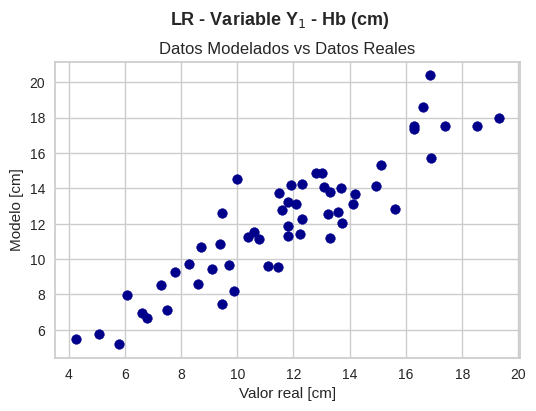

In [65]:
y1_pred = lm_Y1.predict(X_test_org)

print("**** Metricas para LM variable Y1 - Hb (cm) ****")
# print('R2:',lm_Y1.score(X_test_org,Y1_test_org))
print('R2:',r2_score(Y1_test_org,y1_pred))
print('MSE:',mean_squared_error(Y1_test_org,y1_pred))
print('MAE:',mean_absolute_error(Y1_test_org,y1_pred))

plt.figure(figsize=[6,4])
plt.scatter(Y1_test_org,y1_pred, color = "darkblue")
plt.suptitle("LR - Variable Y$_{1}$ - Hb (cm)",
             fontsize=13,
             fontweight="bold")
plt.title('Datos Modelados vs Datos Reales')
plt.xlabel('Valor real [cm]')
plt.ylabel('Modelo [cm]')
plt.subplots_adjust(top=0.85)

**** Metricas para LM variable Y1 - hb (cm) ****
R2: 0.7407282854774311
MSE: 5.238763881990534
MAE: 1.7682484705214117


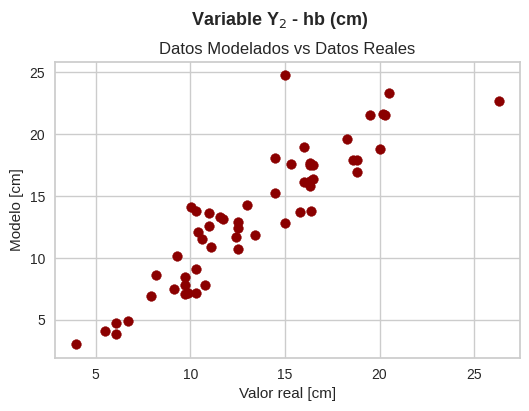

In [66]:
y2_pred = lm_Y2.predict(X_test_org)

print("**** Metricas para LM variable Y1 - hb (cm) ****")
print('R2:',r2_score(Y2_test_org,y2_pred))
print('MSE:',mean_squared_error(Y2_test_org,y2_pred))
print('MAE:',mean_absolute_error(Y2_test_org,y2_pred))

plt.figure(figsize=[6,4])
plt.scatter(Y2_test_org,y2_pred, color = "darkred")
plt.suptitle("Variable Y$_{2}$ - hb (cm)",
             fontsize=13,
             fontweight="bold")
plt.title('Datos Modelados vs Datos Reales')
plt.xlabel('Valor real [cm]')
plt.ylabel('Modelo [cm]')
plt.subplots_adjust(top=0.85)

### Cross validation

Con los datos de entrenamiento se puede implementar el *cross validation* y conocer el ajuste del modelo y su varianza.

#### Y1

In [67]:
kfold = KFold(n_splits=10, shuffle= True, random_state=7)
results_CV_Y1 = cross_val_score(lm_Y1, X_train_org, Y1_train_org, cv=kfold, scoring='r2')
print(results_CV_Y1)
print(results_CV_Y1.mean())

[ 0.68189067 -0.10705039  0.74381903  0.93378862  0.63812039  0.78736628
  0.8836043   0.59897371  0.73409534  0.92655963]
0.6821167592981137


In [68]:
results_CV_Y1 = cross_validate(lm_Y1,df_X,Y1,return_train_score=True,cv=10)

CV_train_LR_Y1 = results_CV_Y1['train_score']
CV_test_LR_Y1 = results_CV_Y1['test_score']

print(
    'TRAIN scores CV - LR Y1: \n',
    CV_train_LR_Y1,"\n",
    "R2 Promedio:",np.mean(CV_train_LR_Y1),
 )

print(
    'TEST scores CV - LR Y1: \n',
    CV_test_LR_Y1,"\n",
    "R2 Promedio:",np.mean(CV_test_LR_Y1),
)

TRAIN scores CV - LR Y1: 
 [0.78716111 0.78848027 0.78785617 0.7875424  0.7832218  0.7835642
 0.78586117 0.78570017 0.18119135 0.9698057 ] 
 R2 Promedio: 0.7440384342157303
TEST scores CV - LR Y1: 
 [ 0.57671787 -0.14273469  0.36940147  0.49368683  0.80358612  0.90280319
  0.85744992  0.88156071  0.91680761 -0.14033984] 
 R2 Promedio: 0.5518939196144138


#### Y2

In [69]:
kfold = KFold(n_splits=10, shuffle= True, random_state=5)
results_CV_Y2 = cross_val_score(lm_Y2, X_train_org, Y2_train_org, cv=kfold, scoring='r2')
print(results_CV_Y2)
print(results_CV_Y2.mean())

[0.74974891 0.98946659 0.81266426 0.76042014 0.99502588 0.78119117
 0.85116044 0.8928684  0.90883053 0.68093821]
0.8422314530800726


In [70]:
results_CV_Y2 = cross_validate(lm_Y2,df_X,Y2,return_train_score=True,cv=10)

CV_train_LR_Y2 = results_CV_Y2['train_score']
CV_test_LR_Y2 = results_CV_Y2['test_score']

print(
    'TRAIN scores CV - LR Y1: \n',
    CV_train_LR_Y2,"\n",
    "R2 Promedio:",np.mean(CV_train_LR_Y2),
 )

print(
    'TEST scores CV - LR Y1: \n',
    CV_test_LR_Y2,"\n",
    "R2 Promedio:",np.mean(CV_test_LR_Y2),
)

TRAIN scores CV - LR Y1: 
 [0.98362439 0.98251981 0.9863471  0.98423524 0.98362169 0.98294855
 0.98357627 0.98223646 0.84088413 0.98471071] 
 R2 Promedio: 0.9694704349982665
TEST scores CV - LR Y1: 
 [0.71358452 0.86108372 0.46995189 0.64481611 0.42763033 0.79098668
 0.66831097 0.95990566 0.95548397 0.30332188] 
 R2 Promedio: 0.6795075729175597


### Residuals

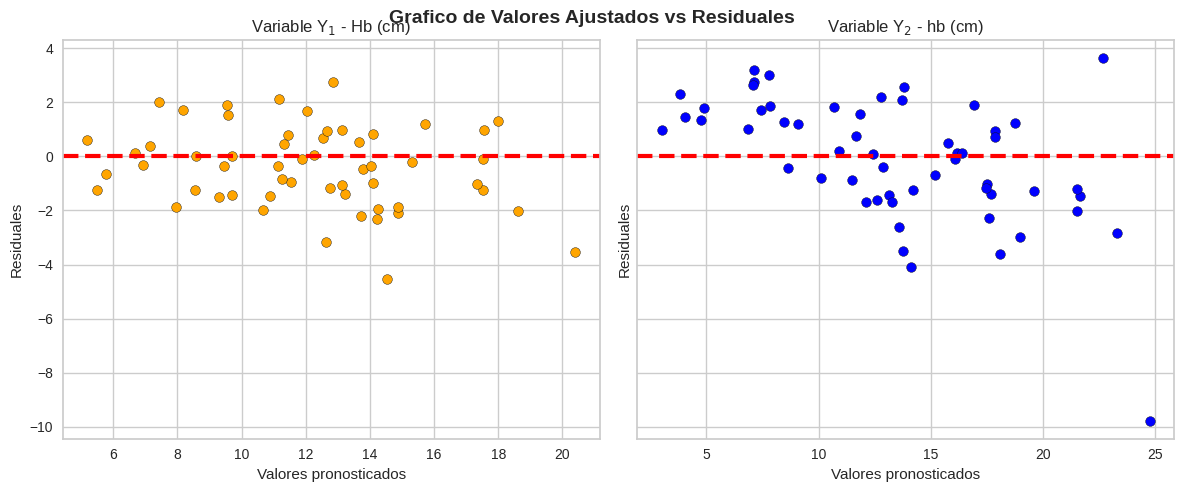

In [71]:
# prediction = modelname.predict(x_test)
# residual = (y_test - prediction)
residuals_Y1 = Y1_test_org - y1_pred
residuals_Y2 = Y2_test_org - y2_pred


fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax[0].scatter(x=y1_pred,y=residuals_Y1, color="orange", edgecolor='k')
xmin=min(y1_pred)
xmax = max(y1_pred)
ax[0].axhline(y=0,color='red',linestyle='--',lw=3)
ax[0].set(xlabel = "Valores pronosticados", ylabel = "Residuales", title = "Variable Y$_{1}$ - Hb (cm)")

ax[1].scatter(x=y2_pred,y=residuals_Y2, color="blue", edgecolor='k')
xmin=min(y2_pred)
xmax = max(y2_pred)
ax[1].axhline(y=0,color='red',linestyle='--',lw=3)
ax[1].set(xlabel = "Valores pronosticados", ylabel = "Residuales", title = "Variable Y$_{2}$ - hb (cm)")

plt.suptitle("Grafico de Valores Ajustados vs Residuales",fontweight="bold",fontsize=14)
plt.subplots_adjust(top=0.875)
# fig.subplots_adjust()
fig.tight_layout()

In [72]:
from sklearn.preprocessing import normalize
normalize(residuals_Y1[:,np.newaxis], axis=0).ravel()

<ipython-input-72-fbccda0fb5b8>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  normalize(residuals_Y1[:,np.newaxis], axis=0).ravel()


array([-0.30581685, -0.12230616, -0.18104229,  0.06973429, -0.12905876,
        0.05943322, -0.05700172, -0.1067408 , -0.17522144, -0.16182242,
        0.18442612,  0.01100802,  0.00445063, -0.16231184,  0.14959269,
       -0.39172681,  0.07173834,  0.03178869,  0.14511875, -0.19215396,
       -0.08153719, -0.0090062 ,  0.0397778 , -0.03031687,  0.11327964,
       -0.10055113, -0.17019161, -0.0319686 , -0.12213593, -0.17061633,
       -0.01794912,  0.05246496, -0.04162793,  0.00085193, -0.10693153,
       -0.08492328,  0.08323306,  0.10254994,  0.17426793,  0.13119212,
       -0.1088493 ,  0.08347441,  0.0826254 ,  0.23952783, -0.12777688,
       -0.07337092, -0.00997337, -0.02847297, -0.08958698,  0.04705071,
        0.0006124 , -0.19978788,  0.16349554, -0.0295146 , -0.09032515,
       -0.27471984])

In [73]:
np.std((residuals_Y1 - residuals_Y1.mean())/(residuals_Y1.std()))


0.9910312089651149

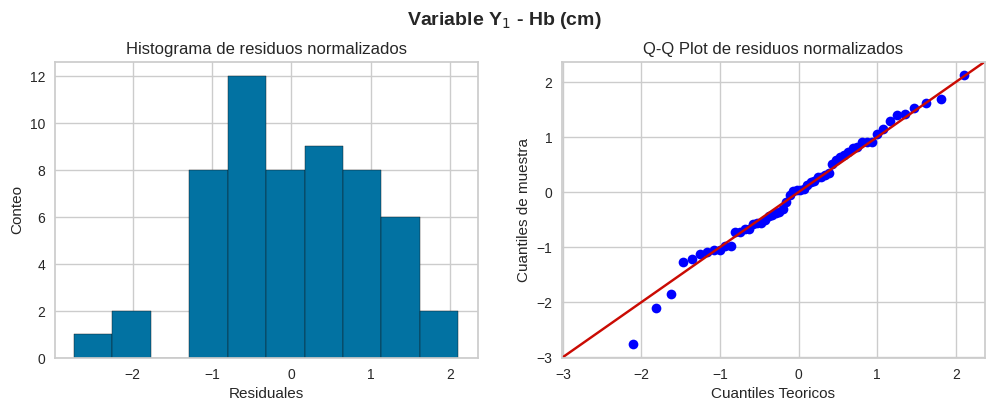

In [74]:
from sklearn.preprocessing import normalize
from statsmodels.graphics.gofplots import qqplot

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
res_norm = (residuals_Y1 - residuals_Y1.mean())/(residuals_Y1.std())
ax[0].hist(res_norm, bins=10,edgecolor='k')
ax[0].set(xlabel = "Residuales", ylabel = "Conteo", title = "Histograma de residuos normalizados")

qqplot(res_norm, line='45',fit='True', ax = ax[1])
ax[1].set(xlabel = "Cuantiles Teoricos", ylabel = "Cuantiles de muestra", title = "Q-Q Plot de residuos normalizados")

plt.suptitle("Variable Y$_{1}$ - Hb (cm)",fontweight="bold",fontsize=14)
plt.subplots_adjust(top=0.85)
fig.subplots_adjust()
# fig.tight_layout()

# hist(lm.resid_pearson,bins=20,edgecolor='k')

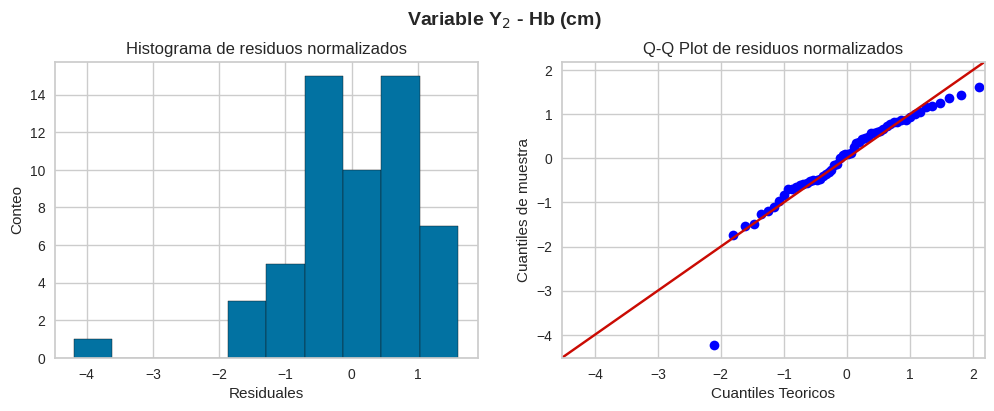

In [75]:
from sklearn.preprocessing import normalize
from statsmodels.graphics.gofplots import qqplot

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
res_norm = (residuals_Y2 - residuals_Y2.mean())/(residuals_Y2.std())
ax[0].hist(res_norm, bins=10,edgecolor='k')
ax[0].set(xlabel = "Residuales", ylabel = "Conteo", title = "Histograma de residuos normalizados")

qqplot(res_norm, line='45',fit='True', ax = ax[1])
ax[1].set(xlabel = "Cuantiles Teoricos", ylabel = "Cuantiles de muestra", title = "Q-Q Plot de residuos normalizados")

plt.suptitle("Variable Y$_{2}$ - Hb (cm)",fontweight="bold",fontsize=14)
plt.subplots_adjust(top=0.85)
fig.subplots_adjust()

## Regularization

### Ridge

Ridge con alpha = 0, es equvalente a aplicar LinearRegresion (OLS-Sklearn)

#### Y1

In [76]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

alphas = np.array([1000,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0])
param_grid = dict(alpha=alphas)
grid = GridSearchCV(estimator=Ridge(fit_intercept = True), param_grid=param_grid)
grid.fit(df_X, Y1)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.5999520871684404
0.0


In [77]:
# RandomSearch
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_grid = {'alpha': uniform()}
rsearch = RandomizedSearchCV(estimator=Ridge(fit_intercept = True), param_distributions=param_grid, n_iter=1000, random_state=1)
rsearch.fit(df_X, Y1)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

0.5999495828211282
0.00011437481734488664


In [78]:
ridge_Y1 = Ridge(alpha = 0.00011437481734488664, fit_intercept = True)
ridge_Y1.fit(X_train_org,Y1_train_org)

print("Ridge - Y1")
print('R2 - Sklearn:',ridge_Y1.score(X_train_org,Y1_train_org))
print('Intercepto:',ridge_Y1.intercept_)
results_ridge_Y1 = pd.DataFrame(ridge_Y1.coef_, X_train_org.columns, columns = ['Coeficientes'])
results_ridge_Y1

Ridge - Y1
R2 - Sklearn: 0.7858066405930397
Intercepto: -0.9269960020544517


,Coeficientes
m (slope),7.925263
T (s),1.425046
Ho (cm),1.015190


In [79]:
y1_pred = ridge_Y1.predict(X_test_org)

print("**** Metricas para Ridge variable Y1 - Hb (cm) ****")
print('R2:',r2_score(Y1_test_org,y1_pred))
print('MSE:',mean_squared_error(Y1_test_org,y1_pred))
print('MAE:',mean_absolute_error(Y1_test_org,y1_pred))

# plt.figure(figsize=[6,4])
# plt.scatter(Y1_test_org,y1_pred, color = "darkblue")
# plt.suptitle("Variable Y$_{1}$ - Hb (cm)",
#              fontsize=13,
#              fontweight="bold")
# plt.title('Datos Modelados vs Datos Reales')
# plt.xlabel('Valor real [cm]')
# plt.ylabel('Modelo [cm]')
# plt.subplots_adjust(top=0.85)

**** Metricas para Ridge variable Y1 - Hb (cm) ****
R2: 0.8000118559072785
MSE: 2.3756697207658677
MAE: 1.241378540599276


In [80]:
results_CV_Y1 = cross_validate(ridge_Y1,df_X,Y1,return_train_score=True,cv=10)

CV_train_Ridge_Y1 = results_CV_Y1['train_score']
CV_test_Ridge_Y1 = results_CV_Y1['test_score']

print(
    'TRAIN scores CV - Ridge Y1: \n',
    CV_train_Ridge_Y1,"\n",
    "R2 Promedio:",np.mean(CV_train_Ridge_Y1),
 )

print(
    'TEST scores CV - Ridge Y1: \n',
    CV_test_Ridge_Y1,"\n",
    "R2 Promedio:",np.mean(CV_test_Ridge_Y1),
)

TRAIN scores CV - Ridge Y1: 
 [0.78716111 0.78848027 0.78785617 0.7875424  0.7832218  0.7835642
 0.78586117 0.78570017 0.18119135 0.96980569] 
 R2 Promedio: 0.7440384341736613
TEST scores CV - Ridge Y1: 
 [ 0.57669826 -0.14277572  0.36938312  0.49367188  0.80359953  0.90280421
  0.85746634  0.88155984  0.9168063  -0.1403377 ] 
 R2 Promedio: 0.551887605765336


#### Y2

### LASSO

#### Y1

In [81]:
# RandomSearch
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_grid = {'alpha': uniform()}
rsearch = RandomizedSearchCV(estimator=Lasso(fit_intercept = True), param_distributions=param_grid, n_iter=500, random_state=1)
rsearch.fit(df_X, Y1)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

0.5995720477367621
0.00011437481734488664


In [82]:
LASSO_Y1 = Lasso(alpha = 0.00011437481734488664, fit_intercept = True)
LASSO_Y1.fit(X_train_org,Y1_train_org)


print('R2 - Sklearn:',LASSO_Y1.score(X_train_org,Y1_train_org))
print('Intercepto:',LASSO_Y1.intercept_)
results_LASSO_Y1 = pd.DataFrame(LASSO_Y1.coef_, X_train_org.columns, columns = ['Coeficientes'])
results_LASSO_Y1

R2 - Sklearn: 0.7858066144307284
Intercepto: -0.9235303802926271


,Coeficientes
m (slope),7.883488
T (s),1.424437
Ho (cm),1.015183


In [83]:
y1_pred = LASSO_Y1.predict(X_test_org)

print("**** Metricas para LASSO variable Y1 - Hb (cm) ****")
print('R2:',r2_score(Y1_test_org,y1_pred))
print('MSE:',mean_squared_error(Y1_test_org,y1_pred))
print('MAE:',mean_absolute_error(Y1_test_org,y1_pred))

**** Metricas para LASSO variable Y1 - Hb (cm) ****
R2: 0.7999261321132115
MSE: 2.3766880382408266
MAE: 1.241806555889881


In [84]:
results_CV_Y1 = cross_validate(LASSO_Y1,df_X,Y1,return_train_score=True,cv=10)

CV_train_LASSO_Y1 = results_CV_Y1['train_score']
CV_test_LASSO_Y1 = results_CV_Y1['test_score']

print(
    'TRAIN scores CV - LASSO Y1: \n',
    CV_train_LASSO_Y1,"\n",
    "R2 Promedio:",np.mean(CV_train_LASSO_Y1),
 )

print(
    'TEST scores CV - LASSO Y1: \n',
    CV_test_LASSO_Y1,"\n",
    "R2 Promedio:",np.mean(CV_test_LASSO_Y1),
)

TRAIN scores CV - LASSO Y1: 
 [0.78716108 0.78848025 0.78785615 0.78754237 0.78322177 0.78356416
 0.78586114 0.78570015 0.18119124 0.96980566] 
 R2 Promedio: 0.7440383970321871
TEST scores CV - LASSO Y1: 
 [ 0.57597719 -0.14459062  0.36870881  0.49304392  0.80391598  0.90282861
  0.85784774  0.88153218  0.91675039 -0.14029372] 
 R2 Promedio: 0.5515720466398932


# KNN - Regresor

## Global validation

In [85]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve


kfold = ShuffleSplit(n_splits=10)
model = KNeighborsRegressor()
results = cross_val_score(model, df_X_Stand, Y1, cv=kfold)
print(results)
print(results.mean())
print(results.std())

[ 0.34267452  0.73900114 -2.96554873 -0.2127723   0.01337058  0.21077546
 -0.25196435  0.5424694   0.42041814  0.6664348 ]
-0.04951413495153826
1.024794332615031


In [86]:
CV_KNeigh_Y1 = cross_validate(KNeighborsRegressor(n_neighbors=5), df_X, Y1, return_train_score=True, cv=10)
CV_KNeigh_Y2 = cross_validate(KNeighborsRegressor(n_neighbors=5), df_X, Y2, return_train_score=True, cv=10)

print("Results CV KNeighbors (n_neig=5) Y1:", 
"\n Mean TRAIN: ", CV_KNeigh_Y1['train_score'].mean(),
"\n Mean Test: ", CV_KNeigh_Y1['test_score'].mean())

print("Results CV KNeighbors (n_neig=5) Y2:", 
"\n Mean TRAIN: ", CV_KNeigh_Y2['train_score'].mean(),
"\n Mean Test: ", CV_KNeigh_Y2['test_score'].mean())


Results CV KNeighbors (n_neig=5) Y1: 
 Mean TRAIN:  0.6019025385802472 
 Mean Test:  0.02361111911319924
Results CV KNeighbors (n_neig=5) Y2: 
 Mean TRAIN:  0.7027788152327964 
 Mean Test:  0.5872476673450813


## Validation curve

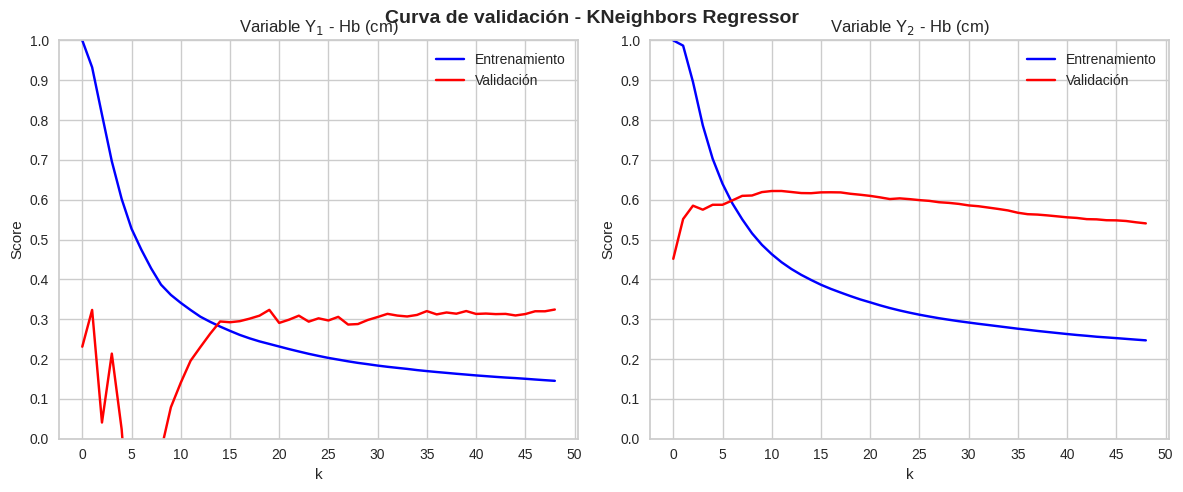

In [87]:
k = np.arange(1,50,1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=False)
train_scores, test_scores = validation_curve(KNeighborsRegressor(), df_X, Y1, param_name='n_neighbors', 
param_range=k, cv=10)
ax[0].plot(np.mean(train_scores,axis=1),label="Entrenamiento", color="blue")
ax[0].plot(np.mean(test_scores,axis=1),label="Validación", color="red")
ax[0].set(xlabel = "k", ylabel = "Score", title = "Variable Y$_{1}$ - Hb (cm)", 
yticks=np.arange(0, 1.02, 0.1),xticks = np.arange(0, 51, 5), ylim=[0,1])
ax[0].legend(loc="upper right")

train_scores, test_scores = validation_curve(KNeighborsRegressor(), df_X, Y2, param_name='n_neighbors', 
param_range=k, cv=10)
ax[1].plot(np.mean(train_scores,axis=1),label="Entrenamiento", color="blue")
ax[1].plot(np.mean(test_scores,axis=1),label="Validación", color="red")
ax[1].set(xlabel = "k", ylabel = "Score", title = "Variable Y$_{2}$ - Hb (cm)",
yticks=np.arange(0, 1.02, 0.1),xticks = np.arange(0, 51, 5), ylim=[0,1])
ax[1].legend(loc="upper right")

plt.suptitle("Curva de validación - KNeighbors Regressor",fontweight="bold",fontsize=14)
plt.subplots_adjust(top=0.9)
# fig.subplots_adjust()
fig.tight_layout()

## Fit Model and Predict

R2 Y1 - KNN: 0.9442893276292961
**** Metricas para KNN variable Y1 - Hb (cm) ****
R2: 0.7434627619044439
MSE: 3.0474193935714284
MAE: 1.364853571428571


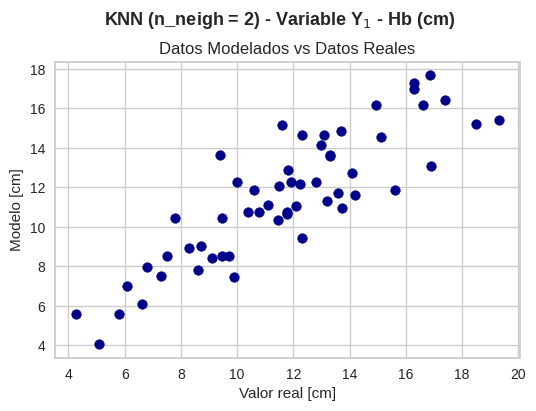

In [88]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, Y1_train_org, Y1_test_org = train_test_split(df_X,Y1, train_size=0.8, random_state=1)

KNN_Y1 = KNeighborsRegressor(n_neighbors=2)
KNN_Y1.fit(X_train_org,Y1_train_org)

print('R2 Y1 - KNN:',KNN_Y1.score(X_train_org,Y1_train_org))

y1_pred = KNN_Y1.predict(X_test_org)

print("**** Metricas para KNN variable Y1 - Hb (cm) ****")
# print('R2:',lm_Y1.score(X_test_org,Y1_test_org))
print('R2:',r2_score(Y1_test_org,y1_pred))
print('MSE:',mean_squared_error(Y1_test_org,y1_pred))
print('MAE:',mean_absolute_error(Y1_test_org,y1_pred))

plt.figure(figsize=[6,4])
plt.scatter(Y1_test_org,y1_pred, color = "darkblue")
plt.suptitle("KNN (n_neigh = 2) - Variable Y$_{1}$ - Hb (cm)",
             fontsize=13,
             fontweight="bold")
plt.title('Datos Modelados vs Datos Reales')
plt.xlabel('Valor real [cm]')
plt.ylabel('Modelo [cm]')
plt.subplots_adjust(top=0.85)

# results_lm_Y1 = pd.DataFrame(KNN_Y1.coef_, X_train_org.columns, columns = ['Coeficientes'])
# results_lm_Y1

R2 Y2 - KNN: 0.8957901265082304
**** Metricas para KNN variable Y2 - hb (cm) ****
R2: 0.7797371927324692
MSE: 4.450561995873016
MAE: 1.686559523809524


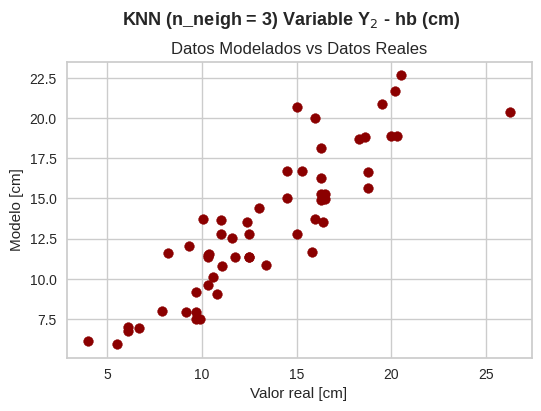

In [89]:
KNN_Y2 = KNeighborsRegressor(n_neighbors=3)
KNN_Y2.fit(X_train_org,Y2_train_org)

print('R2 Y2 - KNN:',KNN_Y2.score(X_train_org,Y2_train_org))

y2_pred = KNN_Y2.predict(X_test_org)

print("**** Metricas para KNN variable Y2 - hb (cm) ****")
print('R2:',r2_score(Y2_test_org,y2_pred))
print('MSE:',mean_squared_error(Y2_test_org,y2_pred))
print('MAE:',mean_absolute_error(Y2_test_org,y2_pred))

plt.figure(figsize=[6,4])
plt.scatter(Y2_test_org,y2_pred, color = "darkred")
plt.suptitle("KNN (n_neigh = 3) Variable Y$_{2}$ - hb (cm)",
             fontsize=13,
             fontweight="bold")
plt.title('Datos Modelados vs Datos Reales')
plt.xlabel('Valor real [cm]')
plt.ylabel('Modelo [cm]')
plt.subplots_adjust(top=0.85)

In [90]:
# from sklearn.model_selection import RandomizedSearchCV

# n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 

# max_features = ['auto', 'log2']
# max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 
# max_depth.append(None)
# bootstrap = [True, False]
# r_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'bootstrap': bootstrap}
# print(random_grid)

## Cross validation

Con los datos de entrenamiento se puede implementar el *cross validation* y conocer el ajuste del modelo y su varianza.

In [91]:
CV_KNeigh_Y1 = cross_validate(KNN_Y1,df_X,Y1,return_train_score=True,cv=10)

CV_train_KNN_Y1 = CV_KNeigh_Y1['train_score']
CV_test_KNN_Y1 = CV_KNeigh_Y1['test_score']

print(
    'TRAIN scores CV - KNN Y1: \n',
    CV_train_KNN_Y1,"\n",
    "R2 Promedio:",np.mean(CV_train_KNN_Y1),
 )

print(
    'TEST scores CV - KNN Y1: \n',
    CV_test_KNN_Y1,"\n",
    "R2 Promedio:",np.mean(CV_test_KNN_Y1),
)

TRAIN scores CV - KNN Y1: 
 [0.94414802 0.94443208 0.94402223 0.94453201 0.94296139 0.94300712
 0.94361695 0.94369906 0.78478157 0.98785297] 
 R2 Promedio: 0.9323053396991845
TEST scores CV - KNN Y1: 
 [ 5.68693442e-01 -6.74462691e-01  6.30616523e-01  2.70625095e-02
  5.55124220e-01  8.24152247e-01  7.34279951e-01  6.61269104e-01
 -6.29341623e-04 -9.34571725e-02] 
 R2 Promedio: 0.32326487914120283


In [92]:
CV_KNeigh_Y2 = cross_validate(KNN_Y2,df_X,Y2,return_train_score=True,cv=10)

CV_train_KNN_Y2 = CV_KNeigh_Y2['train_score']
CV_test_KNN_Y2 = CV_KNeigh_Y2['test_score']

print(
    'TRAIN scores CV - KNN Y2: \n',
    CV_train_KNN_Y2,"\n",
    "R2 Promedio:",np.mean(CV_train_KNN_Y2),
 )

print(
    'TEST scores CV - KNN Y2: \n',
    CV_test_KNN_Y2,"\n",
    "R2 Promedio:",np.mean(CV_test_KNN_Y2),
)

TRAIN scores CV - KNN Y2: 
 [0.89687043 0.89532871 0.897462   0.89874547 0.89507007 0.89435792
 0.8961446  0.89581217 0.89046283 0.89582047] 
 R2 Promedio: 0.89560746692664
TEST scores CV - KNN Y2: 
 [0.30725521 0.72764822 0.48268124 0.46595212 0.74752145 0.79637071
 0.7305556  0.83199209 0.01968063 0.74001035] 
 R2 Promedio: 0.584966762246711


# Support Vector Regression

In [93]:
from scipy.stats import expon, reciprocal
expon(scale=1.0)

## Hyperparameter selection

In [94]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}


param_distribs = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
                        'C' : np.arange(0,100,1),
                        'degree' : [2,3,4,5,6,7],
                        # 'coef0' : [0.01,0.1,0.5],
                        # 'gamma' : ('auto','scale')
                        }


svm_reg = SVR()

rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                n_iter=100, cv=5, scoring='r2',
                verbose=2, random_state=42)

rnd_search.fit(df_X, Y1)
print(rnd_search.best_score_)
print(rnd_search.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ........................C=84, degree=7, kernel=poly; total time=   0.2s
[CV] END ........................C=84, degree=7, kernel=poly; total time=   0.1s
[CV] END ........................C=84, degree=7, kernel=poly; total time=   0.1s
[CV] END ........................C=84, degree=7, kernel=poly; total time=   0.1s
[CV] END ........................C=84, degree=7, kernel=poly; total time=  11.1s
[CV] END .........................C=82, degree=4, kernel=rbf; total time=   0.0s
[CV] END .........................C=82, degree=4, kernel=rbf; total time=   0.0s
[CV] END .........................C=82, degree=4, kernel=rbf; total time=   0.0s
[CV] END .........................C=82, degree=4, kernel=rbf; total time=   0.0s
[CV] END .........................C=82, degree=4, kernel=rbf; total time=   0.0s
[CV] END .....................C=35, degree=5, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=35, degree=5, 

In [95]:
param_distribs = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
                        'C' : np.arange(1,100,2),
                        'degree' : [2,3,4,5,6,7],
                        # 'coef0' : [0.01,0.1,0.5],
                        # 'gamma' : ('auto','scale')
                        }


svm_reg = SVR()

rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                n_iter=100, cv=5, scoring='r2',
                verbose=2, random_state=42)

rnd_search.fit(df_X_Stand, Y1)
print(rnd_search.best_score_)
print(rnd_search.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .........................C=99, degree=2, kernel=rbf; total time=   0.0s
[CV] END .........................C=99, degree=2, kernel=rbf; total time=   0.0s
[CV] END .........................C=99, degree=2, kernel=rbf; total time=   0.0s
[CV] END .........................C=99, degree=2, kernel=rbf; total time=   0.0s
[CV] END .........................C=99, degree=2, kernel=rbf; total time=   0.1s
[CV] END ........................C=73, degree=2, kernel=poly; total time=   0.1s
[CV] END ........................C=73, degree=2, kernel=poly; total time=   0.0s
[CV] END ........................C=73, degree=2, kernel=poly; total time=   0.1s
[CV] END ........................C=73, degree=2, kernel=poly; total time=   0.1s
[CV] END ........................C=73, degree=2, kernel=poly; total time=   0.0s
[CV] END .........................C=9, degree=3, kernel=poly; total time=   0.0s
[CV] END .........................C=9, degree=

In [96]:
param_distribs = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
                        'C' : np.arange(1,100,2),
                        'degree' : [2,3,4,5,6,7],
                        # 'coef0' : [0.01,0.1,0.5],
                        # 'gamma' : ('auto','scale')
                        }


svm_reg = SVR()

rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                n_iter=100, cv=5, scoring='r2',
                verbose=2, random_state=42)

rnd_search.fit(df_X_Stand, Y1)
print(rnd_search.best_score_)
print(rnd_search.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .........................C=99, degree=2, kernel=rbf; total time=   0.0s
[CV] END .........................C=99, degree=2, kernel=rbf; total time=   0.0s
[CV] END .........................C=99, degree=2, kernel=rbf; total time=   0.0s
[CV] END .........................C=99, degree=2, kernel=rbf; total time=   0.0s
[CV] END .........................C=99, degree=2, kernel=rbf; total time=   0.0s
[CV] END ........................C=73, degree=2, kernel=poly; total time=   0.0s
[CV] END ........................C=73, degree=2, kernel=poly; total time=   0.0s
[CV] END ........................C=73, degree=2, kernel=poly; total time=   0.0s
[CV] END ........................C=73, degree=2, kernel=poly; total time=   0.0s
[CV] END ........................C=73, degree=2, kernel=poly; total time=   0.0s
[CV] END .........................C=9, degree=3, kernel=poly; total time=   0.0s
[CV] END .........................C=9, degree=

In [97]:
param_distribs = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
                        'C' : np.arange(1,100,2),
                        'degree' : [2,3,4,5,6,7],
                        # 'coef0' : [0.01,0.1,0.5],
                        # 'gamma' : ('auto','scale')
                        }


svm_reg = SVR()

rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                n_iter=100, cv=5, scoring='r2',
                verbose=2, random_state=42)

rnd_search.fit(df_X, Y2)
print(rnd_search.best_score_)
print(rnd_search.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .........................C=99, degree=2, kernel=rbf; total time=   0.0s
[CV] END .........................C=99, degree=2, kernel=rbf; total time=   0.0s
[CV] END .........................C=99, degree=2, kernel=rbf; total time=   0.0s
[CV] END .........................C=99, degree=2, kernel=rbf; total time=   0.0s
[CV] END .........................C=99, degree=2, kernel=rbf; total time=   0.0s
[CV] END ........................C=73, degree=2, kernel=poly; total time=   0.0s
[CV] END ........................C=73, degree=2, kernel=poly; total time=   0.0s
[CV] END ........................C=73, degree=2, kernel=poly; total time=   0.0s
[CV] END ........................C=73, degree=2, kernel=poly; total time=   0.0s
[CV] END ........................C=73, degree=2, kernel=poly; total time=   0.0s
[CV] END .........................C=9, degree=3, kernel=poly; total time=   0.0s
[CV] END .........................C=9, degree=

## Fit Model and Predict

R2 Y1 - SVR: 0.7755762241668283
**** Metricas para SVR variable Y1 - Hb (cm) ****
R2: 0.8260574293442603
MSE: 2.066272978999348
MAE: 1.1464308369175826


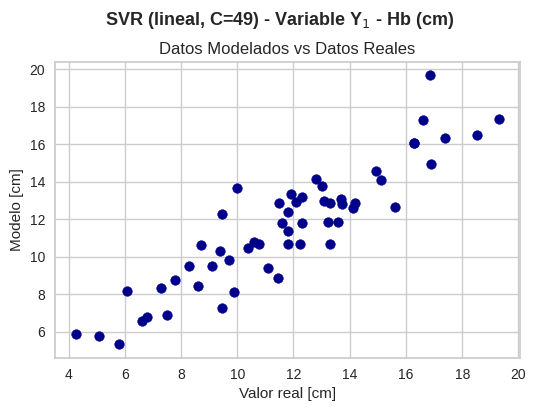

In [98]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, Y1_train_org, Y1_test_org = train_test_split(df_X,Y1, train_size=0.8, random_state=1)

svm_reg_Y1 = SVR(kernel="linear",C=49)
# svm_reg_Y1 = SVR(C=49)
svm_reg_Y1.fit(X_train_org,Y1_train_org)

print('R2 Y1 - SVR:',svm_reg_Y1.score(X_train_org,Y1_train_org))

y1_pred = svm_reg_Y1.predict(X_test_org)

print("**** Metricas para SVR variable Y1 - Hb (cm) ****")
# print('R2:',lm_Y1.score(X_test_org,Y1_test_org))
print('R2:',r2_score(Y1_test_org,y1_pred))
print('MSE:',mean_squared_error(Y1_test_org,y1_pred))
print('MAE:',mean_absolute_error(Y1_test_org,y1_pred))

plt.figure(figsize=[6,4])
plt.scatter(Y1_test_org,y1_pred, color = "darkblue")
plt.suptitle("SVR (lineal, C=49) - Variable Y$_{1}$ - Hb (cm)",
             fontsize=13,
             fontweight="bold")
plt.title('Datos Modelados vs Datos Reales')
plt.xlabel('Valor real [cm]')
plt.ylabel('Modelo [cm]')
plt.subplots_adjust(top=0.85)

R2 Y2 - SVR: 0.9850306778788004
**** Metricas para SVR variable Y2 - Hb (cm) ****
R2: 0.7187622787232889
MSE: 5.682602204373917
MAE: 1.7472258302144985


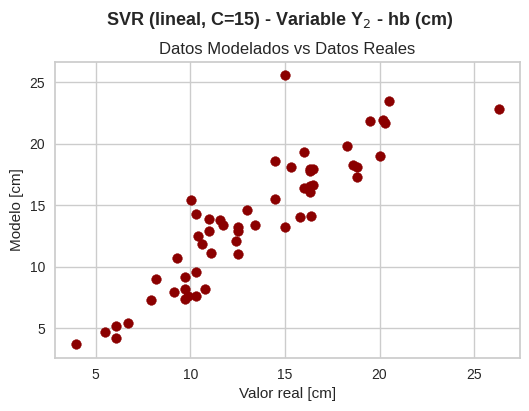

In [99]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, Y2_train_org, Y2_test_org = train_test_split(df_X,Y2, train_size=0.8, random_state=1)

svm_reg_Y2 = SVR(kernel="linear",C=15)
# svm_reg_Y2 = SVR(C=49)
svm_reg_Y2.fit(X_train_org,Y2_train_org)

print('R2 Y2 - SVR:',svm_reg_Y2.score(X_train_org,Y2_train_org))

y2_pred = svm_reg_Y2.predict(X_test_org)

print("**** Metricas para SVR variable Y2 - Hb (cm) ****")
print('R2:',r2_score(Y2_test_org,y2_pred))
print('MSE:',mean_squared_error(Y2_test_org,y2_pred))
print('MAE:',mean_absolute_error(Y2_test_org,y2_pred))

plt.figure(figsize=[6,4])
plt.scatter(Y2_test_org,y2_pred, color = "darkred")
plt.suptitle("SVR (lineal, C=15) - Variable Y$_{2}$ - hb (cm)",
             fontsize=13,
             fontweight="bold")
plt.title('Datos Modelados vs Datos Reales')
plt.xlabel('Valor real [cm]')
plt.ylabel('Modelo [cm]')
plt.subplots_adjust(top=0.85)

## Cross validation

In [100]:
CV_SVR_Y1 = cross_validate(svm_reg_Y1,df_X,Y1,return_train_score=True,cv=10)

CV_train_SVR_Y1 = CV_SVR_Y1['train_score']
CV_test_SVR_Y1 = CV_SVR_Y1['test_score']
print(
    'TRAIN scores CV - SVR Y1: \n',
    CV_train_SVR_Y1,"\n",
    "R2 Promedio:",np.mean(CV_train_SVR_Y1),
 )

print(
    'TEST scores CV - SVR Y1: \n',
    CV_test_SVR_Y1,"\n",
    "R2 Promedio:",np.mean(CV_test_SVR_Y1),
)

TRAIN scores CV - SVR Y1: 
 [0.7790719  0.7824475  0.77840462 0.77739152 0.77366951 0.77466421
 0.77628092 0.77614896 0.1665354  0.95811663] 
 R2 Promedio: 0.734273117788599
TEST scores CV - SVR Y1: 
 [ 0.73478332  0.40168246  0.6349906   0.67279654  0.80393141  0.89434107
  0.83795535  0.80669448  0.96112349 -0.12360379] 
 R2 Promedio: 0.6624694917439321


In [101]:
CV_SVR_Y2 = cross_validate(svm_reg_Y2,df_X,Y2,return_train_score=True,cv=10)

CV_train_SVR_Y2 = CV_SVR_Y2['train_score']
CV_test_SVR_Y2 = CV_SVR_Y2['test_score']
print(
    'TRAIN scores CV - SVR Y2: \n',
    CV_train_SVR_Y2,"\n",
    "R2 Promedio:",np.mean(CV_train_SVR_Y2),
 )

print(
    'TEST scores CV - SVR Y2: \n',
    CV_test_SVR_Y2,"\n",
    "R2 Promedio:",np.mean(CV_test_SVR_Y2),
)

TRAIN scores CV - SVR Y2: 
 [0.97438675 0.97703045 0.98360935 0.98099161 0.9816974  0.98220321
 0.97787646 0.97682491 0.83656854 0.98199132] 
 R2 Promedio: 0.9653180005762213
TEST scores CV - SVR Y2: 
 [0.69494187 0.88490384 0.4682254  0.53961505 0.66615372 0.85044245
 0.76225323 0.96460125 0.96235079 0.21902671] 
 R2 Promedio: 0.7012514308652273


# ENSEMBLED - Randon Forest Regressor

In [102]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# print(rf.get_params())

from pprint import pprint
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


## Hyperparameter selection

In [103]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
print(rf_random.fit(df_X, Y1))

rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)


{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': False}

In [104]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [1000, 1400, 1800, 2200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring = 'neg_mean_absolute_error', cv = 5, 
                           n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(df_X,Y1)

grid_search.best_params_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 2200}

In [105]:
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
print(rf_random.fit(df_X, Y2))

rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)


{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': False}

In [106]:
rf_random.best_score_

-3.028803391836744

## Fit Model and Predict

R2 Y1 - RFR: 0.9062277377358973
**** Metricas para RFR variable Y1 - Hb (cm) ****
R2: 0.8212323928587993
MSE: 2.1235898421169215
MAE: 1.0676558649660137


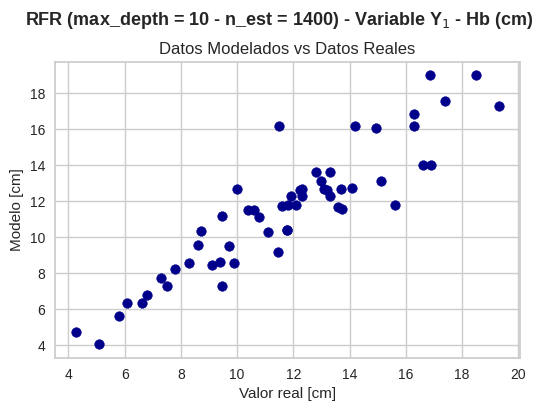

In [107]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, Y1_train_org, Y1_test_org = train_test_split(df_X,Y1, train_size=0.8, random_state=1)

RFR_Y1 = RandomForestRegressor(n_estimators=1400,min_samples_split=2,
                                min_samples_leaf=2,max_features='auto',
                                max_depth=10,bootstrap=False)
RFR_Y1.fit(X_train_org,Y1_train_org)

print('R2 Y1 - RFR:',RFR_Y1.score(X_train_org,Y1_train_org))

y1_pred = RFR_Y1.predict(X_test_org)

print("**** Metricas para RFR variable Y1 - Hb (cm) ****")
print('R2:',r2_score(Y1_test_org,y1_pred))
print('MSE:',mean_squared_error(Y1_test_org,y1_pred))
print('MAE:',mean_absolute_error(Y1_test_org,y1_pred))

plt.figure(figsize=[6,4])
plt.scatter(Y1_test_org,y1_pred, color = "darkblue")
plt.suptitle("RFR (max_depth = 10 - n_est = 1400) - Variable Y$_{1}$ - Hb (cm)",
             fontsize=13,
             fontweight="bold")
plt.title('Datos Modelados vs Datos Reales')
plt.xlabel('Valor real [cm]')
plt.ylabel('Modelo [cm]')
plt.subplots_adjust(top=0.85)

R2 Y2 - RFR: 0.9938926431724027
**** Metricas para RFR variable Y2 - Hb (cm) ****
R2: 0.7982940740383504
MSE: 4.075607405370726
MAE: 1.551972723922913


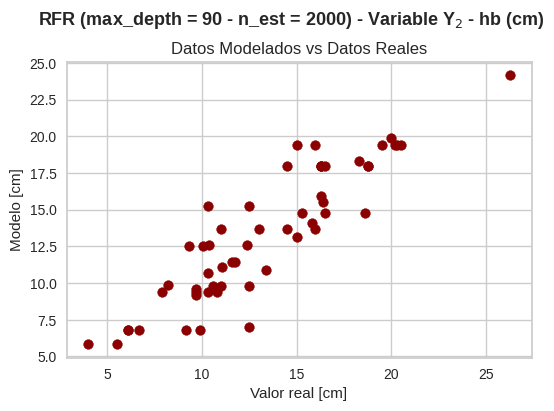

In [108]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, Y2_train_org, Y2_test_org = train_test_split(df_X,Y2, train_size=0.8, random_state=1)

RFR_Y2 = RandomForestRegressor(n_estimators=2000,min_samples_split=10,
                                min_samples_leaf=2,max_features='auto',
                                max_depth=90,bootstrap=False)
RFR_Y2.fit(X_train_org,Y2_train_org)

print('R2 Y2 - RFR:',RFR_Y2.score(X_train_org,Y2_train_org))

y2_pred = RFR_Y2.predict(X_test_org)

print("**** Metricas para RFR variable Y2 - Hb (cm) ****")
print('R2:',r2_score(Y2_test_org,y2_pred))
print('MSE:',mean_squared_error(Y2_test_org,y2_pred))
print('MAE:',mean_absolute_error(Y2_test_org,y2_pred))

plt.figure(figsize=[6,4])
plt.scatter(Y2_test_org,y2_pred, color = "darkred")
plt.suptitle("RFR (max_depth = 90 - n_est = 2000) - Variable Y$_{2}$ - hb (cm)",
             fontsize=13,
             fontweight="bold")
plt.title('Datos Modelados vs Datos Reales')
plt.xlabel('Valor real [cm]')
plt.ylabel('Modelo [cm]')
plt.subplots_adjust(top=0.85)

## Cross validation

In [109]:
CV_RFR_Y1 = cross_validate(RFR_Y1,df_X,Y1,return_train_score=True,cv=10)

CV_train_RFR_Y1 = CV_RFR_Y1['train_score']
CV_test_RFR_Y1 = CV_RFR_Y1['test_score']
print(
    'TRAIN scores CV - RFR Y1: \n',
    CV_train_RFR_Y1,"\n",
    "R2 Promedio:",np.mean(CV_train_RFR_Y1),
 )

print(
    'TEST scores CV - RFR Y1: \n',
    CV_test_RFR_Y1,"\n",
    "R2 Promedio:",np.mean(CV_test_RFR_Y1),
)

TRAIN scores CV - RFR Y1: 
 [0.90720359 0.90653515 0.90734582 0.90712074 0.90580714 0.9054078
 0.90665684 0.90672337 0.63248859 0.99049337] 
 R2 Promedio: 0.8875782406531701
TEST scores CV - RFR Y1: 
 [ 0.63162453 -0.55470533  0.520571    0.18083026  0.52201421  0.78835772
  0.8623972  -5.94320266  0.00699918 -0.07068398] 
 R2 Promedio: -0.30557978794313306


In [110]:
CV_RFR_Y2 = cross_validate(RFR_Y2,df_X,Y2,return_train_score=True,cv=10)

CV_train_RFR_Y2 = CV_RFR_Y2['train_score']
CV_test_RFR_Y2 = CV_RFR_Y2['test_score']
print(
    'TRAIN scores CV - RFR Y2: \n',
    CV_train_RFR_Y2,"\n",
    "R2 Promedio:",np.mean(CV_train_RFR_Y2),
 )

print(
    'TEST scores CV - RFR Y2: \n',
    CV_test_RFR_Y2,"\n",
    "R2 Promedio:",np.mean(CV_test_RFR_Y2),
)

TRAIN scores CV - RFR Y2: 
 [0.99381637 0.9924181  0.99467039 0.99408698 0.99204545 0.9927456
 0.99336854 0.99285649 0.91712197 0.99301911] 
 R2 Promedio: 0.9856148996401162
TEST scores CV - RFR Y2: 
 [0.6775137  0.76261977 0.49846655 0.44488284 0.81356274 0.78350726
 0.45816553 0.71916143 0.0436887  0.67755366] 
 R2 Promedio: 0.5879122182446295


# SELECCIÓN DE MODELO

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

X_train_org, X_test_org, Y1_train_org, Y1_test_org = train_test_split(df_X,Y1, train_size=0.8, random_state=1)
X_train_org, X_test_org, Y2_train_org, Y2_test_org = train_test_split(df_X,Y2, train_size=0.8, random_state=1)

# ------------------- Random Forest Regressor ------------------------
RFR_Y1 = RandomForestRegressor(n_estimators=1400,min_samples_split=2,
                                min_samples_leaf=2,max_features='auto',
                                max_depth=10,bootstrap=False)
RFR_Y1.fit(X_train_org,Y1_train_org)


RFR_Y2 = RandomForestRegressor(n_estimators=2000,min_samples_split=10,
                                min_samples_leaf=2,max_features='auto',
                                max_depth=90,bootstrap=False)
RFR_Y2.fit(X_train_org,Y2_train_org)

# ------------------- Support Vector Regression ------------------------

svm_reg_Y1 = SVR(kernel="linear",C=49)
svm_reg_Y1.fit(X_train_org,Y1_train_org)

svm_reg_Y2 = SVR(kernel="linear",C=15)
svm_reg_Y2.fit(X_train_org,Y2_train_org)

Y1_pred_RFR = RFR_Y1.predict(df_X)
Y1_pred_SVR = svm_reg_Y1.predict(df_X)

Y2_pred_RFR = RFR_Y2.predict(df_X)
Y2_pred_SVR = svm_reg_Y2.predict(df_X)

R2_Y1_pred_RFR = r2_score(Y1,Y1_pred_RFR)
R2_Y1_pred_SVR = r2_score(Y1,Y1_pred_SVR)

R2_Y2_pred_RFR = r2_score(Y2,Y2_pred_RFR)
R2_Y2_pred_SVR = r2_score(Y2,Y2_pred_SVR)

print("R2 - Y1:",R2_Y1_pred_RFR,R2_Y1_pred_SVR)
print("R2 - Y2:",R2_Y2_pred_RFR,R2_Y2_pred_SVR)

R2 - Y1: 0.9050308201317029 0.7766294989705085
R2 - Y2: 0.9908152214061028 0.9808486497056184


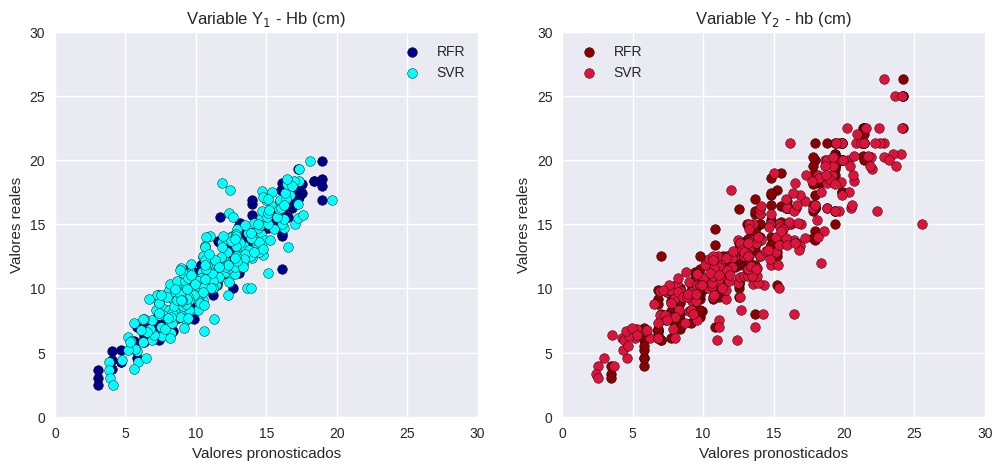

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=False)
ax[0].scatter(x=Y1_pred_RFR,y=Y1, color="darkblue", edgecolor='k',label="RFR")
ax[0].scatter(x=Y1_pred_SVR,y=Y1, color="cyan", edgecolor='k',label="SVR")

ax[0].set(xlabel = "Valores pronosticados", ylabel = "Valores reales", title = "Variable Y$_{1}$ - Hb (cm)",
          ylim=[0,30],xlim=[0,30]
          )
ax[0].legend()


ax[1].scatter(x=Y2_pred_RFR,y=Y2, color="darkred", edgecolor='k',label="RFR")
ax[1].scatter(x=Y2_pred_SVR,y=Y2, color="crimson", edgecolor='k',label="SVR")

ax[1].set(xlabel = "Valores pronosticados", ylabel = "Valores reales", title = "Variable Y$_{2}$ - hb (cm)",
          ylim=[0,30],xlim=[0,30]
          )
ax[1].legend()

# ax[1].scatter(x=y2_pred,y=residuals_Y2, color="blue", edgecolor='k')
# xmin=min(y2_pred)
# xmax = max(y2_pred)
# ax[1].axhline(y=0,color='red',linestyle='--',lw=3)
# ax[1].set(xlabel = "Valores pronosticados", ylabel = "Residuales", title = "Variable Y$_{2}$ - hb (cm)")

# plt.suptitle("Grafico de Valores Ajustados vs Residuales",fontweight="bold",fontsize=14)
# plt.subplots_adjust(top=0.875)
# # fig.subplots_adjust()
# fig.tight_layout()

# PCA

In [ ]:
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
## GGG

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
X = df_simpl.iloc[:,:-1]
scaler=StandardScaler()
ld=scaler.fit(X)
X_scaled=ld.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,m (slope),T (s),Lo (cm),Ho (cm)
0,-0.866025,-0.582417,-0.403541,-0.166287
1,-0.866025,-0.582417,-0.403541,-0.138276
2,-0.866025,-0.582417,-0.403541,0.132505
3,-0.866025,-0.582417,-0.403541,0.393949
4,-0.866025,-0.582417,-0.403541,0.104494
...,...,...,...,...
272,-0.171861,1.692677,0.148246,-0.054240
273,-0.171861,1.692677,0.170412,0.412624
274,-0.171861,2.956618,0.437882,-0.521104
275,-0.171861,2.956618,0.470392,-0.054240


In [ ]:
# X = df_simpl.iloc[:,:-1]
# scaler=StandardScaler()
# ld=scaler.fit(X[["T (s)", "Lo (cm)","Ho (cm)"]])
# X_scaled = ld.transform(X[["T (s)", "Lo (cm)","Ho (cm)"]])
# X_scaled = pd.DataFrame(X_scaled, columns=["T (s)", "Lo (cm)","Ho (cm)"])
# X_scaled["m (slope)"] = X["m (slope)"]
# # X_scaled["Ho (cm)"] = X["Ho (cm)"]
# X_scaled

,T (s),Lo (cm),Ho (cm),m (slope)
0,-0.582417,-0.403541,-0.166287,0.0125
1,-0.582417,-0.403541,-0.138276,0.0125
2,-0.582417,-0.403541,0.132505,0.0125
3,-0.582417,-0.403541,0.393949,0.0125
4,-0.582417,-0.403541,0.104494,0.0125
...,...,...,...,...
272,1.692677,0.148246,-0.054240,0.0500
273,1.692677,0.170412,0.412624,0.0500
274,2.956618,0.437882,-0.521104,0.0500
275,2.956618,0.470392,-0.054240,0.0500


In [ ]:
mean_vect = np.mean(X_scaled, axis=0)
cov_matrix = (X_scaled - mean_vect).T.dot((X_scaled - mean_vect))/(X_scaled.shape[0]-1)
print("La matriz de covarianzas es \n%s"%cov_matrix)

La matriz de covarianzas es 
           m (slope)     T (s)   Lo (cm)   Ho (cm)
m (slope)   1.003623 -0.145955 -0.069581 -0.082839
T (s)      -0.145955  1.003623  0.909828  0.169854
Lo (cm)    -0.069581  0.909828  1.003623  0.176538
Ho (cm)    -0.082839  0.169854  0.176538  1.003623


In [ ]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.0035208  0.0904738  0.91430537 1.00619278]
Vectores propios 
[[-0.16621771  0.06053314 -0.53974093 -0.82303532]
 [ 0.67782218  0.70843395  0.11451871 -0.15988713]
 [ 0.67204128 -0.70311023  0.05750075 -0.22514482]
 [ 0.24756672  0.00964803 -0.83202095  0.49634542]]


In [ ]:
corr_matrix = np.corrcoef(X.T)
eig_vals_corr, eig_vectors_corr = np.linalg.eig(corr_matrix)
print("Valores propios \n%s"%eig_vals_corr)
print("Vectores propios \n%s"%eig_vectors_corr)

Valores propios 
[1.99628787 0.09014718 0.91100463 1.00256032]
Vectores propios 
[[-0.16621771  0.06053314 -0.53974093 -0.82303532]
 [ 0.67782218  0.70843395  0.11451871 -0.15988713]
 [ 0.67204128 -0.70311023  0.05750075 -0.22514482]
 [ 0.24756672  0.00964803 -0.83202095  0.49634542]]


In [ ]:
u,s,v = np.linalg.svd(X_scaled.T)
u

array([[-0.16621771, -0.82303532,  0.53974093, -0.06053314],
       [ 0.67782218, -0.15988713, -0.11451871, -0.70843395],
       [ 0.67204128, -0.22514482, -0.05750075,  0.70311023],
       [ 0.24756672,  0.49634542,  0.83202095, -0.00964803]])

## PCA-ScikitLearn

In [ ]:
n =  X.shape[1] # número de features
pca = PCA(n_components=n).fit(X_scaled)
print(pca.components_)

[[-0.16621771  0.67782218  0.67204128  0.24756672]
 [-0.82303532 -0.15988713 -0.22514482  0.49634542]
 [ 0.53974093 -0.11451871 -0.05750075  0.83202095]
 [ 0.06053314  0.70843395 -0.70311023  0.00964803]]


In [ ]:
print(pca.explained_variance_ratio_)

[0.49907197 0.25064008 0.22775116 0.02253679]


Text(0, 0.5, 'cumulative explained variance')

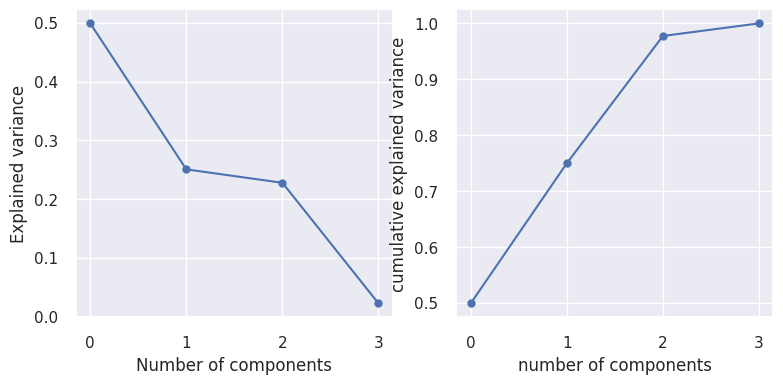

In [ ]:
fig, ax = plt.subplots(1,2,figsize = [9,4])
ax[0].plot(pca.explained_variance_ratio_,marker="o")
ax[0].set_xlabel('Number of components')
ax[0].set_ylabel('Explained variance')
ax[1].plot(np.cumsum(pca.explained_variance_ratio_),marker="o")
ax[1].set_xlabel('number of components')
ax[1].set_ylabel('cumulative explained variance')

In [ ]:
pca_samples = pca.transform(X_scaled)
pca_samples

array([[-0.56319   ,  0.81420907, -0.51588197, -0.1828973 ],
       [-0.55625521,  0.82811261, -0.49257555, -0.18262704],
       [-0.48921886,  0.96251349, -0.26728014, -0.18001454],
       ...,
       [ 2.19789481, -0.68851176, -0.89009641,  1.77125834],
       [ 2.33532293, -0.46410563, -0.50352542,  1.75290439],
       [ 2.47672345, -0.24103031, -0.11729432,  1.73039439]])

In [ ]:
iris.target_names

'sepal length (cm)'

In [ ]:
c, i, iris.target_names

('r', 3, 'sepal length (cm)')

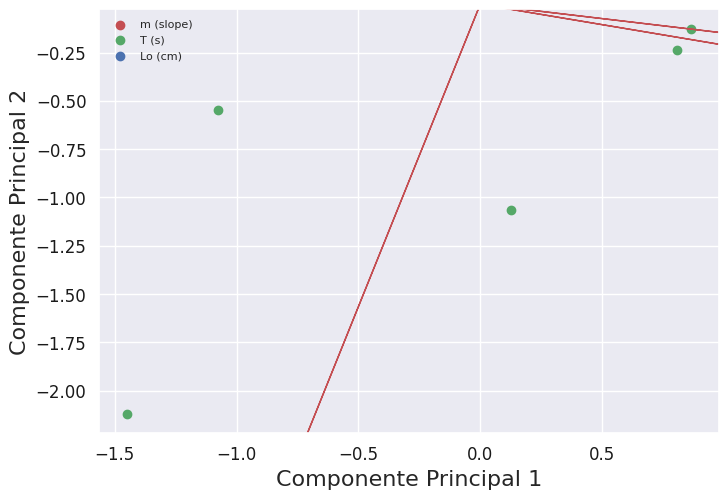

In [ ]:
xvector = pca.components_[0] 
yvector = pca.components_[1]

xs = pca.transform(X_scaled)[:,0] 
ys = pca.transform(X_scaled)[:,1]

## Para visualizar las proyecciones de cada variable en los componentes se utiliza la siguiente función
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    # plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
    #          list(X_scaled.columns.values)[i], color='r') 

for c, i, iris.target_names in zip("rgb", [0, 1, 2], iris.feature_names):
   plt.scatter(pca_samples[Y==i,0], pca_samples[Y==i,1], c=c)
plt.tick_params('y', colors='k', labelsize=12, length=2)
plt.tick_params('x', colors='k', labelsize= 12, length=2)
plt.xlabel("Componente Principal 1", fontsize=16)
plt.ylabel("Componente Principal 2", fontsize=16)
# plt.ylim([-10,10])
# plt.xlim([-10,10])
plt.legend(X.columns, fontsize=8)
plt.show()

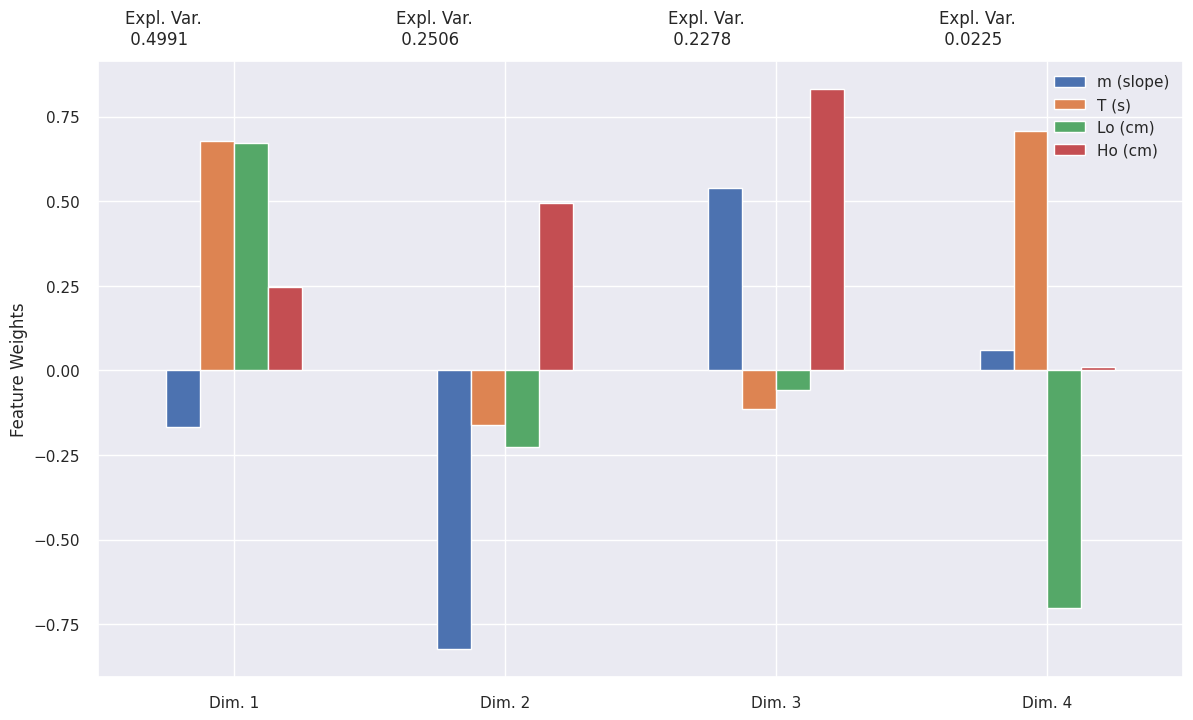

In [ ]:
def pca_results(X_scaled, pca):
    
    dimensions = ['Dim. {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    components = pd.DataFrame(np.round(pca.components_, 4), columns = X_scaled.keys()) 
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl. Var.\n %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(X_scaled, pca)

In [ ]:
print(pca_results.cumsum())

        Explained Variance  m (slope)   T (s)  Lo (cm)  Ho (cm)
Dim. 1              0.4991    -0.1662  0.6778   0.6720   0.2476
Dim. 2              0.7497    -0.9892  0.5179   0.4469   0.7439
Dim. 3              0.9775    -0.4495  0.4034   0.3894   1.5759
Dim. 4              1.0000    -0.3890  1.1118  -0.3137   1.5855
